# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: CUST_ID (Identifikasi pemegang kartu kredit (unik untuk setiap pelanggan))
     - *Numerikal*:   
        - BALANCE: Saldo yang tersisa di akun untuk membeli
        - BALANCE_FREQUENCY: Skor frekuensi update saldo (0-1)
        - PURCHASES: Jumlah pembelian yang dilakukan
        - ONEOFF_PURCHASES: Jumlah maksimum pembelian sekaligus
        - INSTALLMENTS_PURCHASES: Jumlah pembelian dengan cicilan
        - CASH_ADVANCE: Uang muka yang diberikan
        - PURCHASES_FREQUENCY: Skor frekuensi pembelian (0-1)
        - ONEOFFPURCHASESFREQUENCY: Skor frekuensi pembelian sekaligus (0-1)
        - PURCHASESINSTALLMENTSFREQUENCY: Skor frekuensi pembelian cicilan (0-1)
        - CASHADVANCEFREQUENCY: Skor frekuensi pencairan uang muka
        - CASHADVANCETRX: Jumlah transaksi uang muka
        - PURCHASES_TRX: Jumlah transaksi pembelian
        - CREDIT_LIMIT: Batas kredit
        - PAYMENTS: Jumlah pembayaran
        - MINIMUM_PAYMENTS: Jumlah pembayaran minimum
        - PRCFULLPAYMENT: Persentase pembayaran penuh
        - TENURE: Masa layanan kartu kredit

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
!pip install gdown

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
!gdown --id 12LWv2_fdC6w4Mvc8hJW08mZNk8rJ-2OI

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12LWv2_fdC6w4Mvc8hJW08mZNk8rJ-2OI
To: /content/CC_GENERAL.csv
100% 903k/903k [00:00<00:00, 43.5MB/s]


In [3]:
df = pd.read_csv('CC_GENERAL.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Tampilkan informasi dataset
# 1. Memahami Struktur Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Definisi kolom numerik yang komprehensif
numeric_columns = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT', 'TENURE'
]

# Tambahkan kolom frekuensi
frequency_columns = [
    'BALANCE_FREQUENCY',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY'
]

# Tambahkan kolom transaksi
transaction_columns = [
    'PURCHASES_TRX',
    'CASH_ADVANCE_TRX'
]

In [6]:
# Tampilkan beberapa baris pertama
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [7]:
# Cek statistik deskriptif
print(df.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [8]:
# Cek missing values
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


terdapat missing value pada datasetnya pada bagian CREDIT_LIMIT dan MINIMUM_PAYMENTS

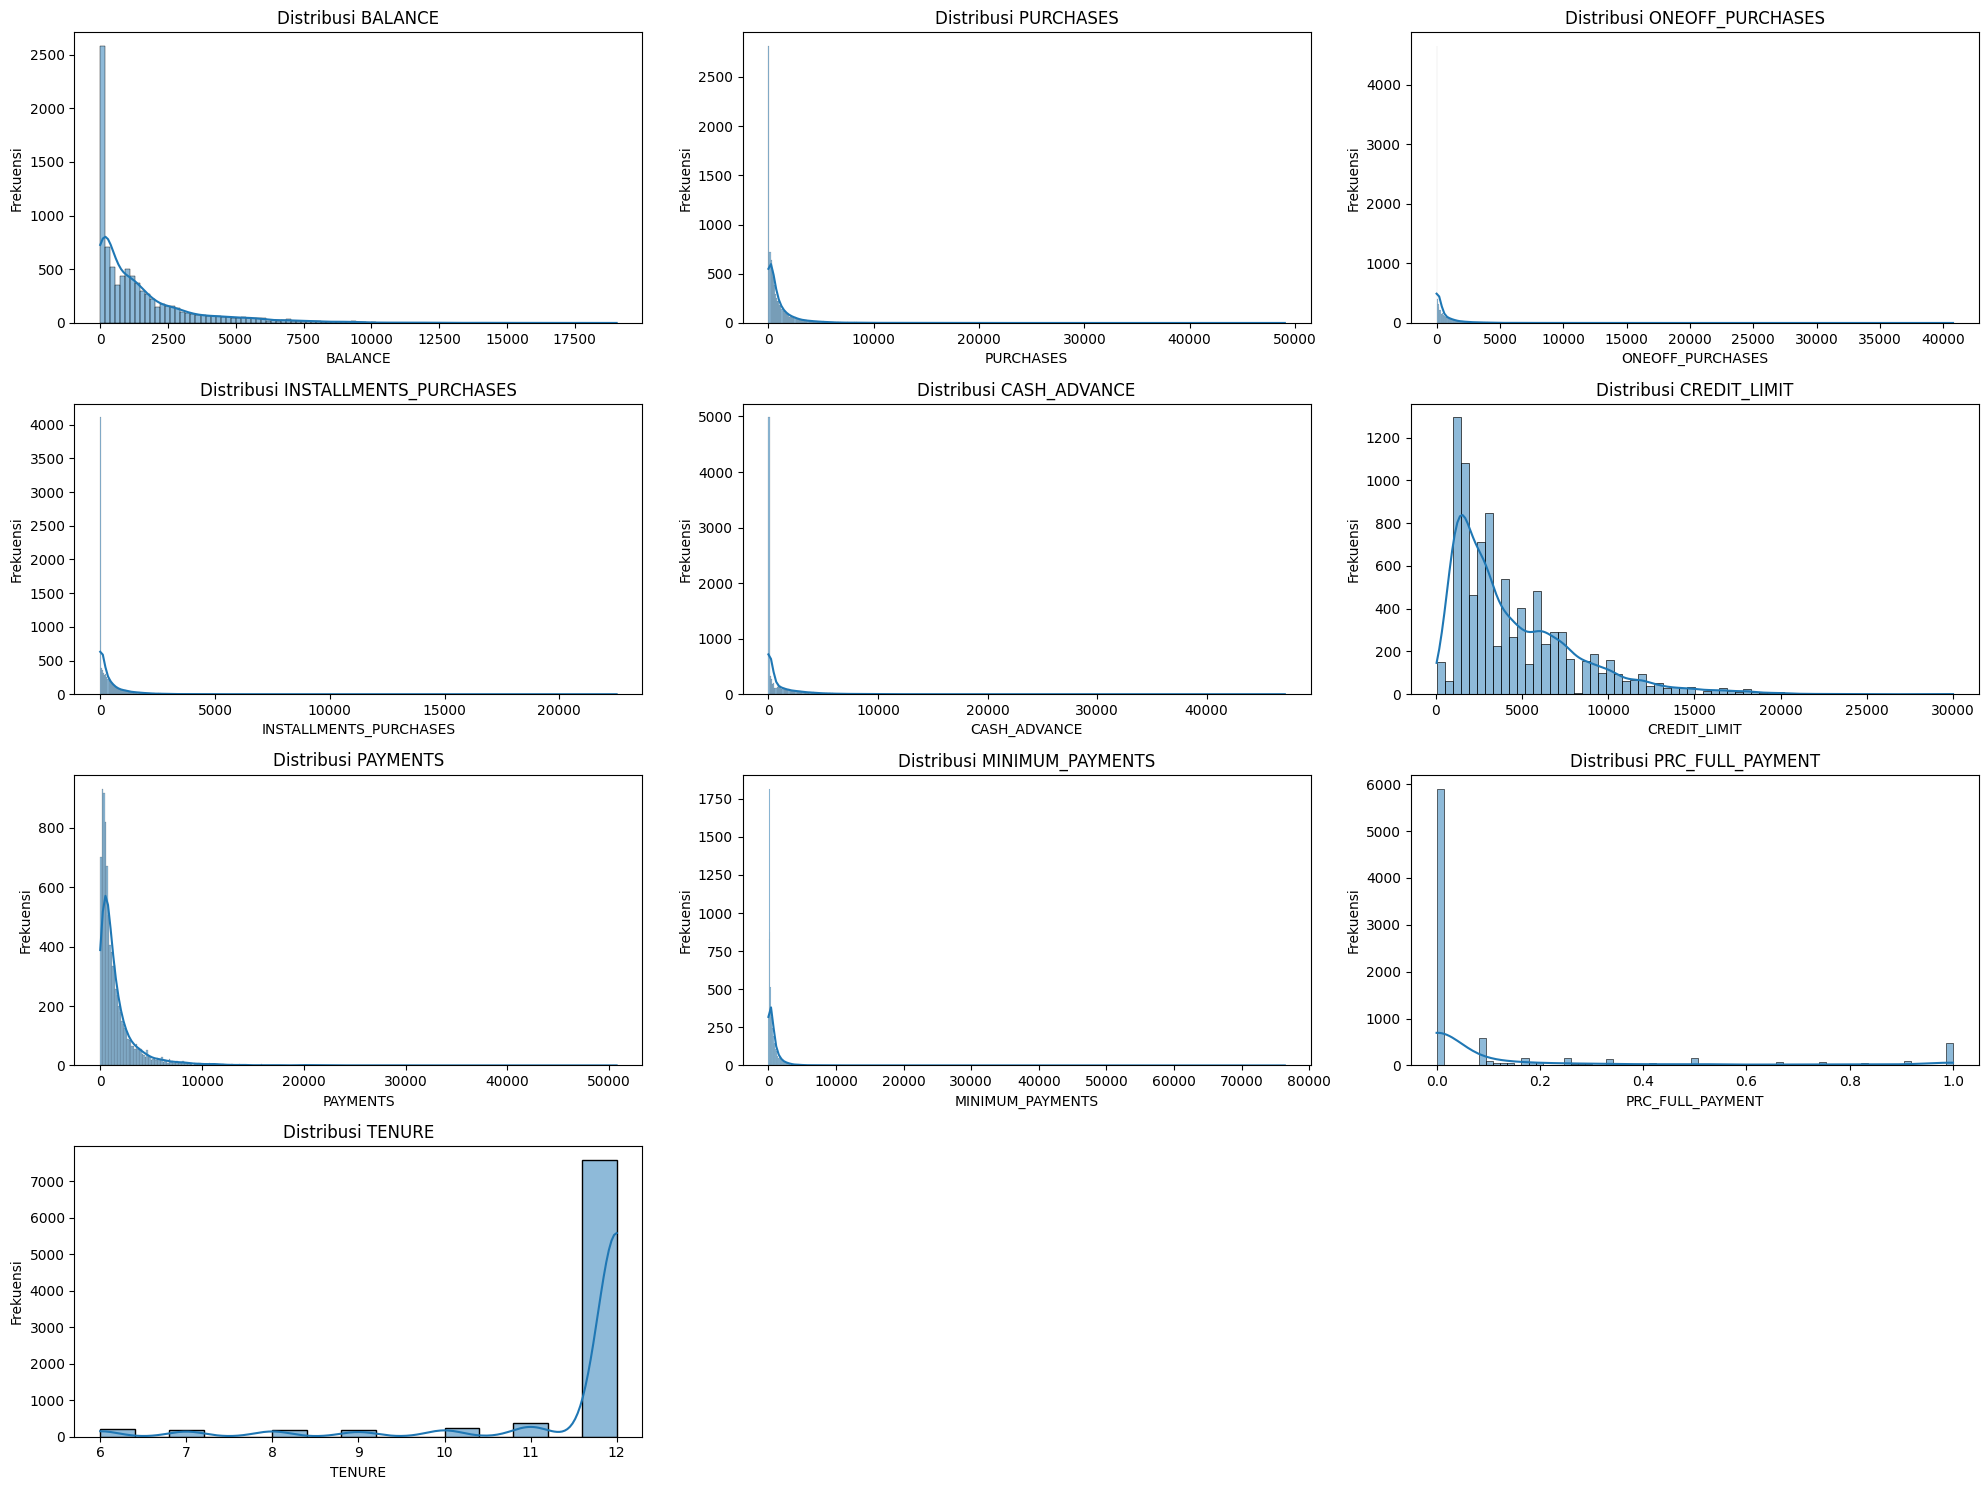

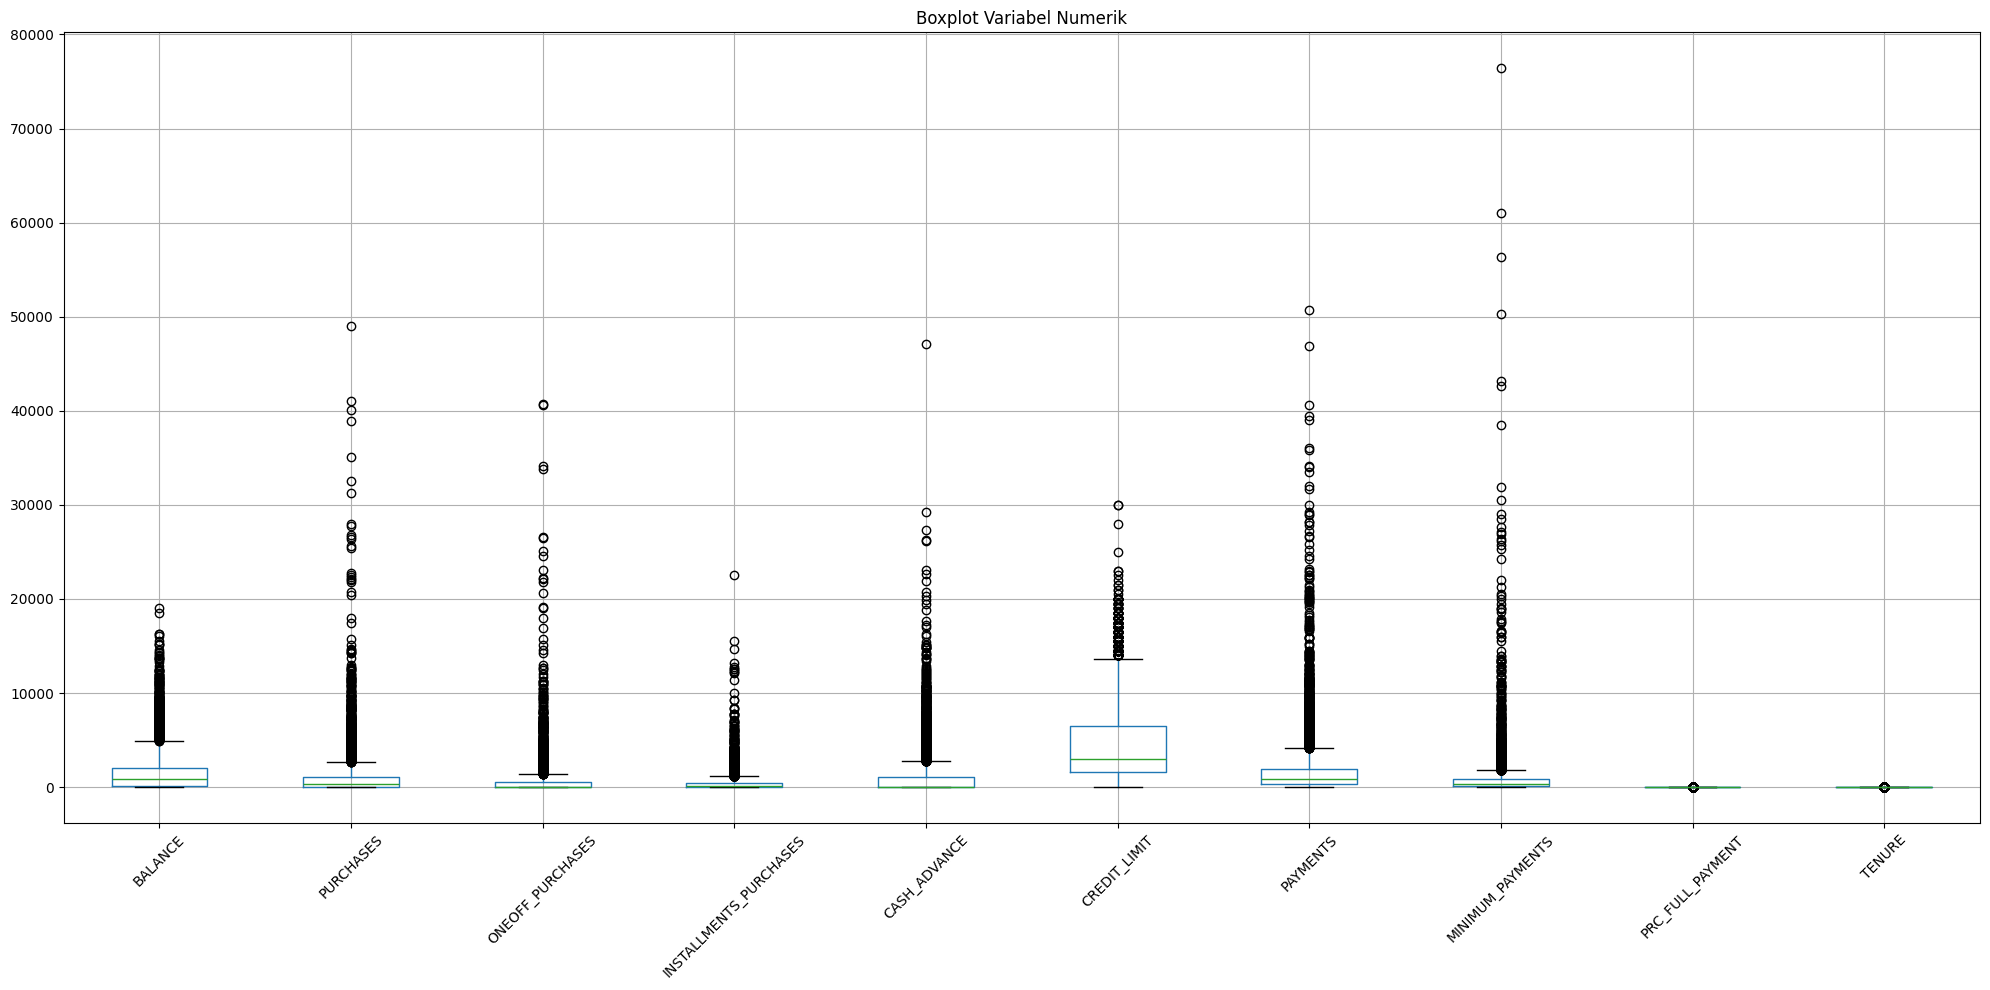

In [9]:


# 1. Analisis Distribusi Variabel Numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Boxplot untuk melihat distribusi dan outliers
plt.figure(figsize=(20, 10))
df[numeric_columns].boxplot()
plt.title('Boxplot Variabel Numerik')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Penjelasan**

Analisis distribusi variabel numerik pada dataset kartu kredit mengungkapkan karakteristik yang kompleks dan beragam. Mayoritas variabel menunjukkan distribusi yang sangat menceng ke kanan, yang mengindikasikan ketidakmerataan data di antara para pemegang kartu kredit. Variabel seperti BALANCE, PURCHASES, dan CASH_ADVANCE memperlihatkan pola yang serupa, dengan konsentrasi tinggi pada nilai-nilai rendah dan beberapa outliers dengan nominal sangat besar.
Dalam konteks saldo (BALANCE) dan pembelian, terlihat bahwa sebagian besar pelanggan memiliki aktivitas keuangan yang relatif terbatas. Hanya segelintir pelanggan yang melakukan transaksi dengan jumlah besar, baik dalam pembelian tunggal (ONEOFF_PURCHASES) maupun pembelian cicilan (INSTALLMENTS_PURCHASES). Hal ini mencerminkan variasi signifikan dalam perilaku keuangan dan kemampuan ekonomi di antara pemegang kartu kredit.

Variabel CREDIT_LIMIT menunjukkan pola serupa, dengan mayoritas pelanggan memiliki batas kredit rendah hingga menengah, sementara sebagian kecil memiliki limit kredit yang jauh lebih tinggi. Pola serupa terlihat pada variabel PAYMENTS dan MINIMUM_PAYMENTS, di mana konsentrasi pembayaran terpusat pada jumlah kecil dengan beberapa pembayaran besar yang mencuat.
Masa layanan (TENURE) menampilkan distribusi yang tidak merata, dengan mayoritas pelanggan terkonsentrasi pada periode tertentu dan sebagian kecil memiliki masa layanan yang lebih panjang. Keberadaan outliers yang signifikan di hampir semua variabel menandakan adanya variasi ekstrem dalam perilaku keuangan pelanggan.

Dari perspektif analisis data, distribusi yang tidak normal ini menghadirkan tantangan tersendiri. Untuk proses clustering selanjutnya, akan diperlukan pendekatan preprocessing yang cermat, seperti normalisasi data, transformasi logaritmik, atau penggunaan metode clustering yang tahan terhadap outliers. Metode seperti DBSCAN atau teknik scaling yang robust (misalnya RobustScaler) mungkin lebih sesuai untuk menangani karakteristik dataset ini.
Kesimpulan utamanya adalah bahwa dataset ini menggambarkan keragaman yang tinggi dalam perilaku keuangan pemegang kartu kredit. Setiap variabel memberikan perspektif unik tentang bagaimana pelanggan berbeda dalam hal penggunaan kartu kredit, dari saldo dan pembelian hingga pembayaran dan masa layanan. Pendekatan analisis yang teliti dan metode clustering yang tepat akan krusial untuk mengekstrak wawasan bermakna dari dataset yang kompleks ini.

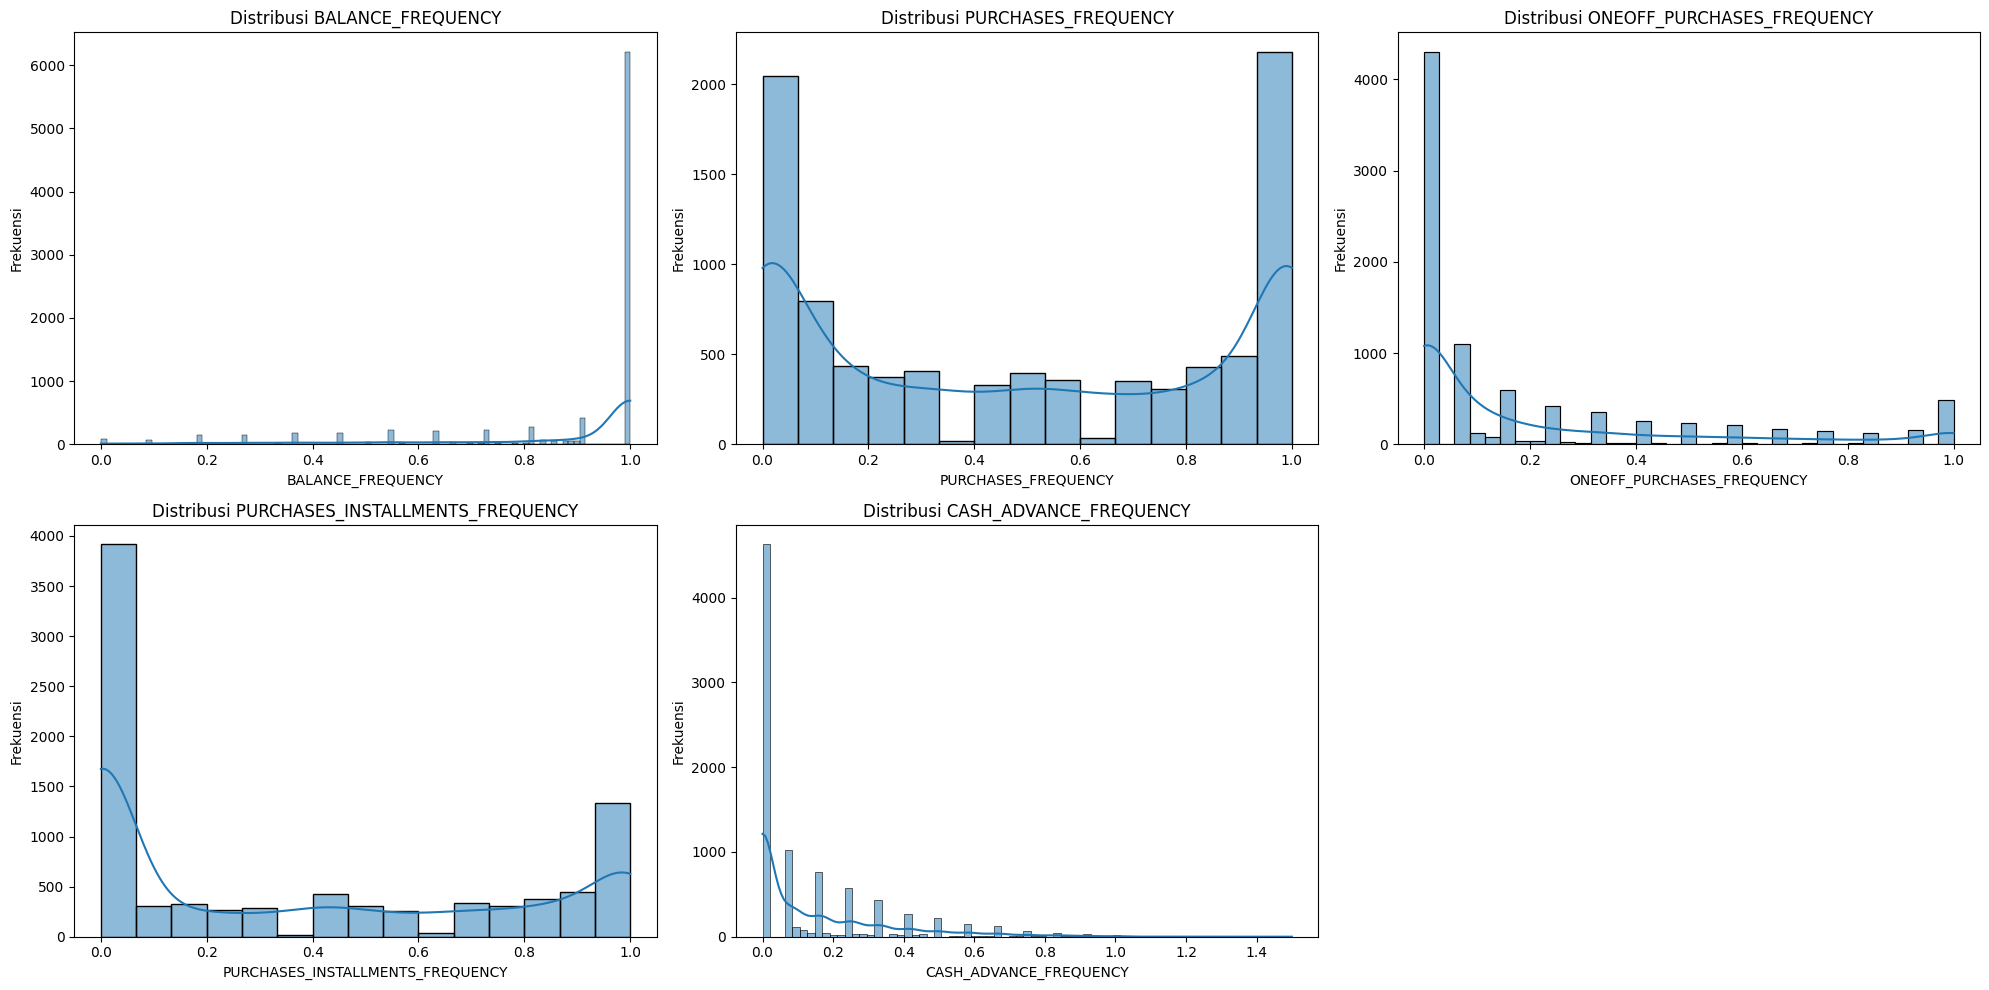

In [10]:
# 2. Analisis Distribusi Variabel Frekuensi
plt.figure(figsize=(20, 10))
for i, col in enumerate(frequency_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

**BALANCE_FREQUENCY:**

- Distribusi tidak merata dengan lonjakan besar pada nilai mendekati 1
- Mayoritas pelanggan memperbarui saldo dengan sangat jarang
- Sebagian kecil pelanggan secara konsisten memperbarui saldo
- Mengindikasikan variasi signifikan dalam kebiasaan pemantauan saldo


**PURCHASES_FREQUENCY:**

- Distribusi menceng ke kanan dengan puncak pada rentang 0-0.2
- Sebagian besar pelanggan memiliki frekuensi pembelian sangat rendah
- Sedikit pelanggan yang melakukan pembelian secara teratur
- Menunjukkan pola penggunaan kartu kredit yang tidak konsisten


**ONEOFF_PURCHASES_FREQUENCY:**

- Serupa dengan distribusi PURCHASES_FREQUENCY
- Konsentrasi tinggi pada frekuensi pembelian sekaligus yang rendah
- Hanya sedikit pelanggan yang sering melakukan pembelian tunggal besar
- Mencerminkan kehati-hatian dalam pengeluaran


**PURCHASES_INSTALLMENTS_FREQUENCY:**

- Distribusi sangat menceng dengan puncak pada nilai sangat rendah
- Hampir semua pelanggan jarang menggunakan pembelian cicilan
- Sedikit pelanggan yang memanfaatkan fasilitas cicilan
- Mengindikasikan preferensi membayar tunai atau menghindari cicilan


**CASH_ADVANCE_FREQUENCY:**

- Distribusi ekstrem menceng ke kanan
- Mayoritas pelanggan hampir tidak pernah mengambil uang muka
- Sangat sedikit pelanggan yang sering menggunakan cash advance
- Menandakan penggunaan kartu kredit yang sangat konservatif

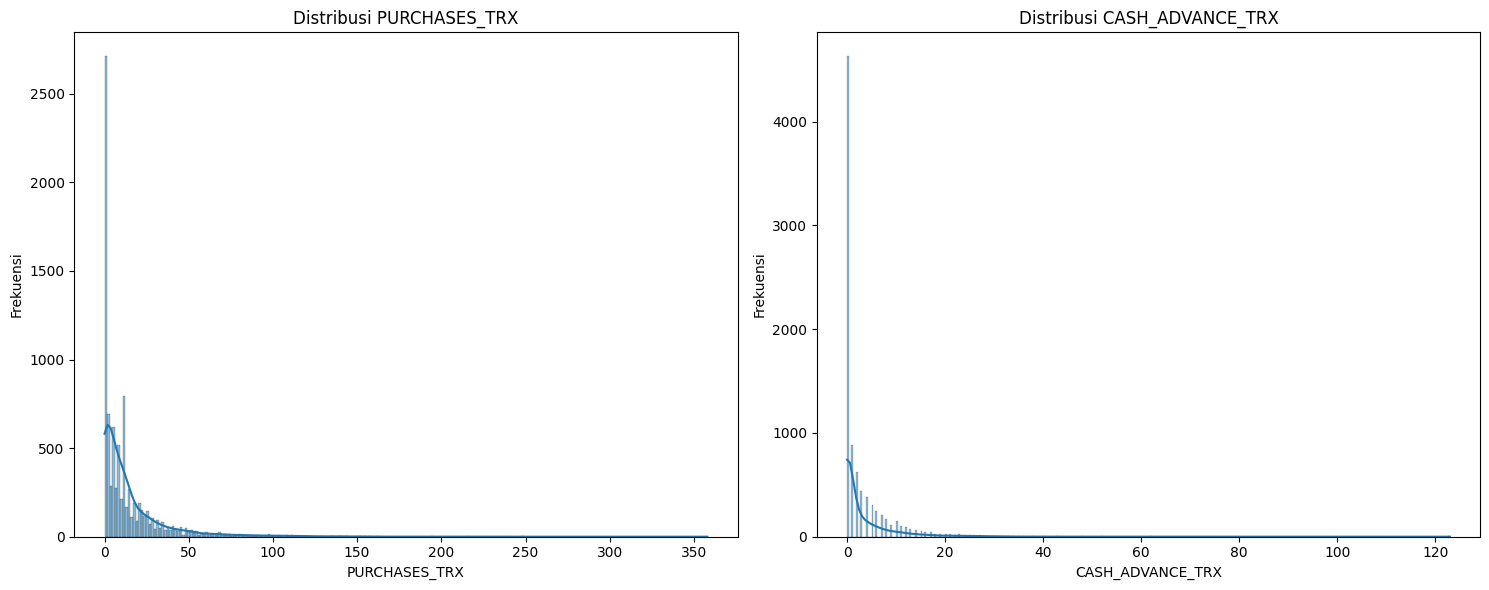

In [11]:
# 3. Analisis Distribusi Variabel Transaksi
plt.figure(figsize=(15, 6))
for i, col in enumerate(transaction_columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Analisis distribusi variabel transaksi mengungkapkan pola yang sangat menarik dalam perilaku penggunaan kartu kredit. Variabel PURCHASES_TRX menunjukkan bahwa mayoritas pelanggan melakukan sejumlah kecil transaksi pembelian, dengan frekuensi tertinggi berada pada rentang 0-50 transaksi. Distribusi yang sangat menceng ke kanan ini mengindikasikan bahwa hanya segelintir pelanggan yang secara konsisten aktif melakukan pembelian menggunakan kartu kredit.

Untuk variabel CASH_ADVANCE_TRX, pola distribusi serupa namun bahkan lebih ekstrem. Hampir semua pelanggan memiliki jumlah transaksi uang muka yang sangat rendah, dengan mayoritas berada pada rentang 0-20 transaksi. Hal ini menandakan bahwa pengambilan uang muka bukanlah praktik umum di antara pemegang kartu kredit dalam dataset ini. Hanya sejumlah kecil pelanggan yang secara teratur menggunakan fasilitas cash advance.

Kedua distribusi ini mencerminkan kehati-hatian pelanggan dalam menggunakan kartu kredit. Rendahnya frekuensi transaksi, baik untuk pembelian maupun pengambilan uang muka, dapat mengindikasikan beberapa hal: kemungkinan pendapatan yang terbatas, sikap konservatif terhadap penggunaan kredit, atau preferensi menggunakan metode pembayaran lain. Variasi ekstrem ini menciptakan peluang menarik untuk segmentasi pelanggan, di mana kelompok dengan pola transaksi berbeda dapat diidentifikasi dan didekati dengan strategi pemasaran yang disesuaikan.

Dari perspektif analisis data, distribusi yang tidak normal ini menggarisbawahi pentingnya menggunakan metode clustering yang dapat menangani variasi ekstrem. Teknik seperti DBSCAN atau hierarchical clustering mungkin lebih sesuai dibandingkan dengan K-means yang sensitif terhadap outliers. Transformasi data seperti log transformation atau penggunaan metode scaling yang robust (misalnya RobustScaler) juga dapat membantu dalam mengekstrak wawasan yang bermakna dari dataset ini.

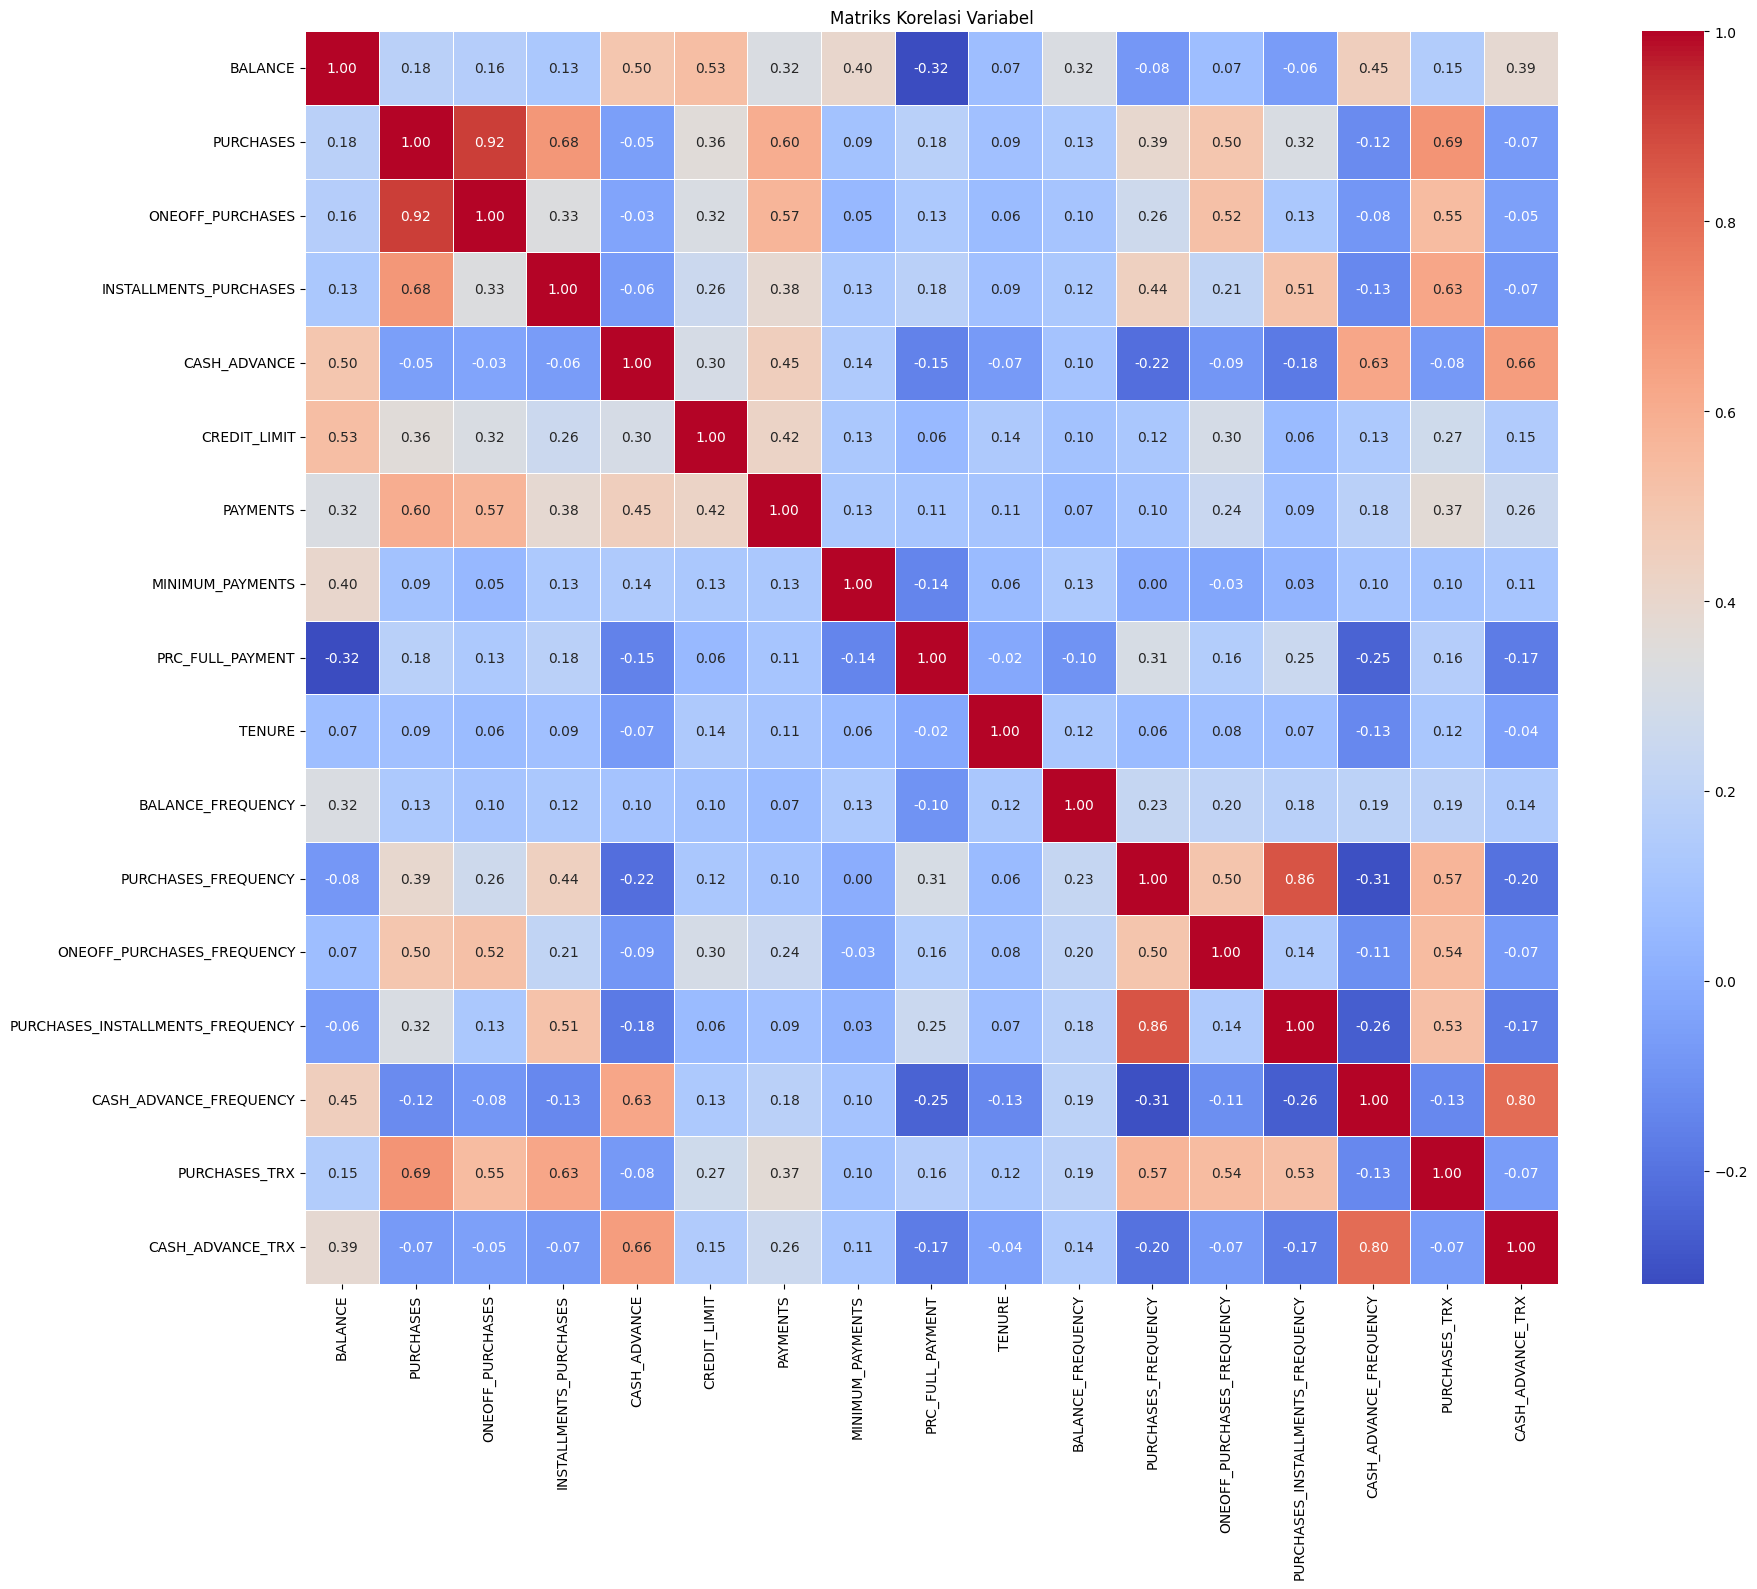

In [12]:
# 4. Analisis Korelasi
# Gabungkan semua kolom numerik untuk korelasi
all_columns = numeric_columns + frequency_columns + transaction_columns

plt.figure(figsize=(20, 16))
correlation_matrix = df[all_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            linewidths=0.5, fmt=".2f", square=True)
plt.title('Matriks Korelasi Variabel')
plt.tight_layout()
plt.show()

Matriks korelasi pada dataset kartu kredit mengungkapkan hubungan kompleks antar variabel. Beberapa korelasi yang paling signifikan terlihat antara variabel pembelian, seperti PURCHASES dan ONEOFF_PURCHASES dengan korelasi tinggi 0.92, menandakan keterkaitan erat antara jumlah dan frekuensi pembelian. Variabel frekuensi juga menunjukkan korelasi kuat, misalnya PURCHASES_FREQUENCY dan ONEOFF_PURCHASES_FREQUENCY dengan korelasi 0.86, yang mengindikasikan pola perilaku pembelian yang serupa.

Menariknya, CASH_ADVANCE memiliki korelasi moderat dengan beberapa variabel seperti CREDIT_LIMIT (0.30) dan BALANCE (0.50), yang mensugestikan bahwa pelanggan dengan saldo dan limit kredit lebih tinggi cenderung lebih sering mengambil uang muka. Variabel pembayaran seperti MINIMUM_PAYMENTS dan PRC_FULL_PAYMENT memiliki korelasi relatif lemah dengan variabel lainnya, menunjukkan keragaman strategi pembayaran di antara pemegang kartu kredit.

Beberapa variabel transaksi seperti PURCHASES_TRX dan CASH_ADVANCE_TRX menunjukkan korelasi positif dengan frekuensi terkait, namun tidak terlalu kuat. Hal ini mencerminkan variasi individu dalam penggunaan kartu kredit. Secara keseluruhan, matriks korelasi mengungkapkan bahwa meskipun terdapat beberapa pola umum, terdapat heterogenitas yang signifikan dalam perilaku keuangan pelanggan, yang membuat dataset ini menarik untuk analisis clustering.Coba lagiClaude dapat membuat kesalahan. Periksa kembali setiap respons.

In [13]:
# 5. Ringkasan Statistik
print("Statistik Deskriptif Variabel Numerik:")
print(df[numeric_columns].describe())

print("\nStatistik Deskriptif Variabel Frekuensi:")
print(df[frequency_columns].describe())

print("\nStatistik Deskriptif Variabel Transaksi:")
print(df[transaction_columns].describe())

Statistik Deskriptif Variabel Numerik:
            BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   8950.000000   8950.000000       8950.000000             8950.000000   
mean    1564.474828   1003.204834        592.437371              411.067645   
std     2081.531879   2136.634782       1659.887917              904.338115   
min        0.000000      0.000000          0.000000                0.000000   
25%      128.281915     39.635000          0.000000                0.000000   
50%      873.385231    361.280000         38.000000               89.000000   
75%     2054.140036   1110.130000        577.405000              468.637500   
max    19043.138560  49039.570000      40761.250000            22500.000000   

       CASH_ADVANCE  CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  \
count   8950.000000   8949.000000   8950.000000       8637.000000   
mean     978.871112   4494.449450   1733.143852        864.206542   
std     2097.163877   3638.815725   2895.0

In [14]:
# 6. Identifikasi Outliers
def identify_outliers(df, columns):
    outliers_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_summary[col] = {
            'total_outliers': len(outliers),
            'percentage': len(outliers) / len(df) * 100
        }
    return outliers_summary

# Tampilkan outliers
print("\nIdentifikasi Outliers:")
outliers_numeric = identify_outliers(df, numeric_columns)
for col, stats in outliers_numeric.items():
    print(f"{col}: {stats['total_outliers']} outliers ({stats['percentage']:.2f}%)")


Identifikasi Outliers:
BALANCE: 695 outliers (7.77%)
PURCHASES: 808 outliers (9.03%)
ONEOFF_PURCHASES: 1013 outliers (11.32%)
INSTALLMENTS_PURCHASES: 867 outliers (9.69%)
CASH_ADVANCE: 1030 outliers (11.51%)
CREDIT_LIMIT: 248 outliers (2.77%)
PAYMENTS: 808 outliers (9.03%)
MINIMUM_PAYMENTS: 841 outliers (9.40%)
PRC_FULL_PAYMENT: 1474 outliers (16.47%)
TENURE: 1366 outliers (15.26%)


Kode untuk identifikasi outliers menggunakan metode Interquartile Range (IQR) bertujuan mendeteksi data ekstrem dalam setiap variabel numerik. Fungsi identify_outliers() menghitung batas bawah dan atas berdasarkan kuartil pertama (Q1) dan ketiga (Q3), dengan outliers didefinisikan sebagai data di luar rentang Q1 - 1.5IQR hingga Q3 + 1.5IQR. Hasil analisis menunjukkan variasi signifikan dalam jumlah outliers antar variabel: INSTALLMENTS_PURCHASES memiliki persentase outliers tertinggi (9.69%), sementara BALANCE memiliki persentase terendah (7.77%). Variabel seperti CREDIT_LIMIT (11.32%) dan CASH_ADVANCE (11.50%) menunjukkan proporsi outliers yang cukup tinggi, mengindikasikan distribusi tidak merata dan keberadaan sejumlah data ekstrem yang berpotensi memengaruhi analisis selanjutnya, khususnya dalam proses clustering.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [15]:
#1. Menangani missing value dengan melakukan imputasi median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-15-45d492f2b7a8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
<ipython-input-15-45d492f2b7a8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [16]:
#cek ulang missing value
print("Setelah Penanganan Missing Values:")
print(df.isnull().sum())

Setelah Penanganan Missing Values:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [17]:
# 2. Penghapusan Data Duplikat
def remove_duplicates(df):
    duplicates_count = df.duplicated().sum()
    df_unique = df.drop_duplicates()

    print(f"\nJumlah data duplikat yang dihapus: {duplicates_count}")
    print(f"Jumlah baris sebelum penghapusan: {len(df)}")
    print(f"Jumlah baris setelah penghapusan: {len(df_unique)}")

    return df_unique

In [18]:
# 3. Deteksi dan Penanganan Outlier
def handle_outliers(df, columns):
    df_processed = df.copy()

    # Metode IQR untuk deteksi outlier
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hitung jumlah outliers
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

        # Gunakan capping (metode winsorization)
        df_processed[col] = np.where(df[col] > upper_bound, upper_bound,
                                     np.where(df[col] < lower_bound, lower_bound, df[col]))

        print(f"Outliers di {col}: {outliers_count} (Diatasi dengan capping)")

    return df_processed

In [19]:
# 4. Normalisasi/Standarisasi
def scale_features(df, columns):
    # Gunakan RobustScaler karena tahan terhadap outliers
    scaler = RobustScaler()
    df_scaled = df.copy()
    df_scaled[columns] = scaler.fit_transform(df[columns])

    return df_scaled

In [20]:
def encode_categorical_data(df):
    """
    Melakukan encoding pada data kategorikal

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset input

    Returns:
    --------
    pandas.DataFrame
        Dataset dengan data kategorikal yang sudah di-encode
    """
    # Identifikasi kolom kategorikal
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Jika ada kolom CUST_ID, kita akan menggunakan Label Encoding
    if 'CUST_ID' in categorical_columns:
        # Label Encoding untuk CUST_ID
        le = LabelEncoder()
        df['CUST_ID_ENCODED'] = le.fit_transform(df['CUST_ID'])

        print("Label Encoding untuk CUST_ID:")
        print(f"Jumlah unique values sebelum encoding: {df['CUST_ID'].nunique()}")
        print(f"Jumlah unique values setelah encoding: {df['CUST_ID_ENCODED'].nunique()}")

    return df



In [21]:
def perform_binning(df, numeric_columns):
    """
    Melakukan binning (pengelompokan) pada variabel numerik

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset input
    numeric_columns : list
        Daftar kolom numerik yang akan di-binning

    Returns:
    --------
    pandas.DataFrame
        Dataset dengan variabel numerik yang sudah di-binning
    """
    df_binned = df.copy()

    # Gunakan KBinsDiscretizer untuk binning
    for col in numeric_columns:
        # Pilih jumlah bin berdasarkan distribusi data
        # n_bins bisa disesuaikan
        kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

        # Lakukan binning
        df_binned[f'{col}_BINNED'] = kbd.fit_transform(df[[col]])

        print(f"\nBinning untuk {col}:")
        binning_summary = pd.Series(df_binned[f'{col}_BINNED']).value_counts()
        print(binning_summary)

    return df_binned

In [22]:
def preprocess_data(df):
    # Gabungkan kolom untuk preprocessing
    all_columns = numeric_columns + frequency_columns

    # Tahapan Preprocessing
    df_processed = df.copy()

    # 2. Hapus duplikat
    df_processed = remove_duplicates(df_processed)

    # 3. Tangani outliers
    df_processed = handle_outliers(df_processed, numeric_columns)

    # 4. Normalisasi fitur
    df_processed = scale_features(df_processed, all_columns)

    # 5. Binning
    df_processed = perform_binning(df_processed, numeric_columns)

    # 6. Normalisasi fitur
    all_columns = numeric_columns + frequency_columns
    df_processed = scale_features(df_processed, all_columns)

    return df_processed

In [23]:
# Jalankan preprocessing
df_preprocessed = preprocess_data(df)

# Tampilkan ringkasan dataset setelah preprocessing
print("\nRingkasan Dataset Setelah Preprocessing:")
print(df_preprocessed.describe())


Jumlah data duplikat yang dihapus: 0
Jumlah baris sebelum penghapusan: 8950
Jumlah baris setelah penghapusan: 8950
Outliers di BALANCE: 695 (Diatasi dengan capping)
Outliers di PURCHASES: 808 (Diatasi dengan capping)
Outliers di ONEOFF_PURCHASES: 1013 (Diatasi dengan capping)
Outliers di INSTALLMENTS_PURCHASES: 867 (Diatasi dengan capping)
Outliers di CASH_ADVANCE: 1030 (Diatasi dengan capping)
Outliers di CREDIT_LIMIT: 248 (Diatasi dengan capping)
Outliers di PAYMENTS: 808 (Diatasi dengan capping)
Outliers di MINIMUM_PAYMENTS: 909 (Diatasi dengan capping)
Outliers di PRC_FULL_PAYMENT: 1474 (Diatasi dengan capping)
Outliers di TENURE: 1366 (Diatasi dengan capping)

Binning untuk BALANCE:
BALANCE_BINNED
0.0    1790
4.0    1790
3.0    1790
2.0    1790
1.0    1790
Name: count, dtype: int64

Binning untuk PURCHASES:
PURCHASES_BINNED
0.0    3580
2.0    1790
3.0    1790
1.0    1790
Name: count, dtype: int64

Binning untuk ONEOFF_PURCHASES:
ONEOFF_PURCHASES_BINNED
0.0    5370
1.0    1790
2.0

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306


Binning untuk PAYMENTS:
PAYMENTS_BINNED
0.0    1790
4.0    1790
1.0    1790
2.0    1790
3.0    1790
Name: count, dtype: int64

Binning untuk MINIMUM_PAYMENTS:
MINIMUM_PAYMENTS_BINNED
0.0    1790
4.0    1790
3.0    1790
2.0    1790
1.0    1790
Name: count, dtype: int64

Binning untuk PRC_FULL_PAYMENT:
PRC_FULL_PAYMENT_BINNED
0.0    7087
1.0    1863
Name: count, dtype: int64

Binning untuk TENURE:
TENURE_BINNED
0.0    8950
Name: count, dtype: int64

Ringkasan Dataset Setelah Preprocessing:
           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      0.268516          -1.104565     0.351117          0.547896   
std       0.798365           2.132138     0.821615          0.886420   
min      -0.453504          -9.000009    -0.337489         -0.065812   
25%      -0.386894          -1.000000    -0.300464         -0.065812   
50%       0.000000           0.000000     0.000000          0.000000   
75

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [24]:
## **a. Pembangunan Model Clustering**

# Persiapan Data untuk Clustering

# Pastikan tidak ada missing values sebelum clustering
df_cluster = df_preprocessed[all_columns].copy()
print("Jumlah missing values dalam data clustering:")
print(df_cluster.isnull().sum())

Jumlah missing values dalam data clustering:
BALANCE                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
BALANCE_FREQUENCY                   0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
dtype: int64


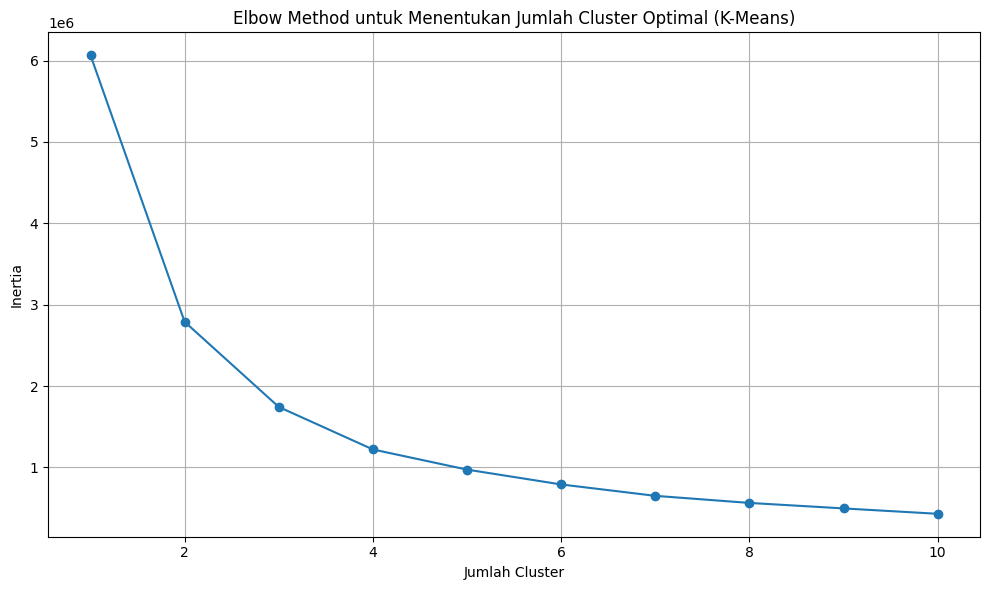

In [25]:
# 1. Menentukan jumlah cluster optimal dengan Elbow Method untuk K-Means
def find_optimal_kmeans_clusters(data, max_clusters=10):
    """
    Menemukan jumlah cluster optimal menggunakan Elbow Method

    Parameters:
    -----------
    data : pandas.DataFrame
        Dataset yang akan digunakan untuk clustering
    max_clusters : int
        Jumlah maksimum cluster yang akan diuji

    Returns:
    --------
    list
        Daftar nilai inertia untuk setiap jumlah cluster
    """
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    return inertia

# Visualisasi Elbow Method
inertia_values = find_optimal_kmeans_clusters(df_cluster)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(inertia_values) + 1), inertia_values, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal (K-Means)')
plt.grid(True)
plt.tight_layout()
plt.show()

Jumlah cluster: 2, Silhouette Score: 0.7556
Jumlah cluster: 3, Silhouette Score: 0.6253
Jumlah cluster: 4, Silhouette Score: 0.5624
Jumlah cluster: 5, Silhouette Score: 0.4106
Jumlah cluster: 6, Silhouette Score: 0.4431
Jumlah cluster: 7, Silhouette Score: 0.4038
Jumlah cluster: 8, Silhouette Score: 0.3911
Jumlah cluster: 9, Silhouette Score: 0.3992
Jumlah cluster: 10, Silhouette Score: 0.3996


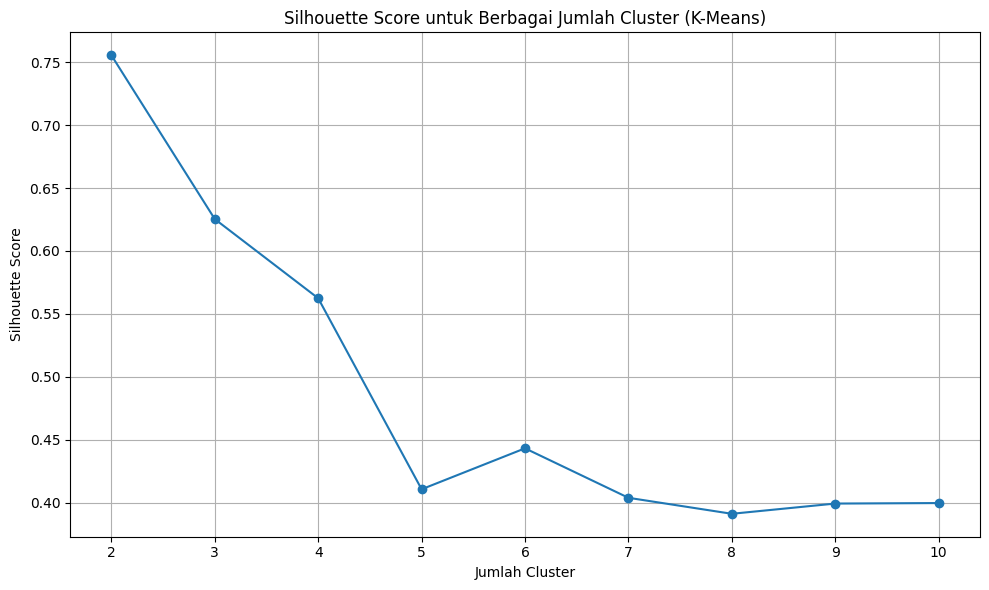

In [26]:
# 2. Mengevaluasi kualitas cluster dengan Silhouette Score untuk K-Means
def evaluate_kmeans_clusters(data, max_clusters=10):
    """
    Evaluasi jumlah cluster optimal menggunakan Silhouette Score

    Parameters:
    -----------
    data : pandas.DataFrame
        Dataset yang akan digunakan untuk clustering
    max_clusters : int
        Jumlah maksimum cluster yang akan diuji

    Returns:
    --------
    list
        Daftar nilai silhouette score untuk setiap jumlah cluster
    """
    silhouette_scores = []

    # Cluster mulai dari 2 karena silhouette tidak terdefinisi untuk 1 cluster
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Jumlah cluster: {k}, Silhouette Score: {silhouette_avg:.4f}")

    return silhouette_scores

# Visualisasi Silhouette Scores
silhouette_values = evaluate_kmeans_clusters(df_cluster)

plt.figure(figsize=(10, 6))
plt.plot(range(2, len(silhouette_values) + 2), silhouette_values, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster (K-Means)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# 3. Implementasi model DBSCAN untuk perbandingan
def evaluate_dbscan(data, eps_values, min_samples_values):
    """
    Evaluasi berbagai parameter DBSCAN

    Parameters:
    -----------
    data : pandas.DataFrame
        Dataset yang akan digunakan untuk clustering
    eps_values : list
        Daftar nilai epsilon yang akan diuji
    min_samples_values : list
        Daftar nilai min_samples yang akan diuji

    Returns:
    --------
    pandas.DataFrame
        Dataframe berisi hasil evaluasi DBSCAN dengan berbagai parameter
    """
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            # Hitung jumlah noise points (label -1)
            n_noise = list(labels).count(-1)

            # Hitung jumlah cluster yang terbentuk (label >= 0)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # Hitung silhouette score jika ada lebih dari 1 cluster dan tidak semua noise
            if n_clusters > 1 and n_noise < len(data):
                # Filter out noise points for silhouette calculation
                filtered_data = data[labels != -1]
                filtered_labels = labels[labels != -1]

                sil_score = silhouette_score(filtered_data, filtered_labels) if len(filtered_data) > 1 else 0
            else:
                sil_score = 0

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_percentage': n_noise / len(data) * 100,
                'silhouette': sil_score
            })

    return pd.DataFrame(results)

# Tentukan range parameter untuk DBSCAN
eps_values = [0.3, 0.5, 0.7, 1.0, 1.2, 1.5]
min_samples_values = [5, 10, 15, 20, 30, 50]

# Evaluasi DBSCAN dengan berbagai parameter
dbscan_results = evaluate_dbscan(df_cluster, eps_values, min_samples_values)

# Tampilkan hasil DBSCAN
print("Hasil evaluasi DBSCAN dengan berbagai parameter:")
print(dbscan_results.sort_values(by='silhouette', ascending=False).head(10))

Hasil evaluasi DBSCAN dengan berbagai parameter:
    eps  min_samples  n_clusters  n_noise  noise_percentage  silhouette
3   0.3           20           3     8778         98.078212    0.740272
2   0.3           15           3     8767         97.955307    0.736303
1   0.3           10          11     8625         96.368715    0.643634
10  0.5           30           4     8613         96.234637    0.638121
9   0.5           20           7     8474         94.681564    0.584875
17  0.7           50           4     8519         95.184358    0.567682
29  1.2           50           4     7143         79.810056    0.565112
0   0.3            5          30     8414         94.011173    0.555232
8   0.5           15           9     8398         93.832402    0.511502
16  0.7           30           6     8361         93.418994    0.489047


In [28]:
# 4. Implementasi model K-Means final berdasarkan jumlah cluster optimal
# Pilih jumlah cluster berdasarkan hasil evaluasi (contoh: k=4)
optimal_k = 2  # Ganti dengan nilai optimal berdasarkan evaluasi

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_model.fit_predict(df_cluster)

# Tambahkan label cluster ke dataframe
df_preprocessed['cluster_kmeans'] = kmeans_labels

# 5. Implementasi model DBSCAN final berdasarkan parameter optimal
# Pilih parameter optimal berdasarkan evaluasi
optimal_eps = 0.5  # Ganti dengan nilai optimal
optimal_min_samples = 15  # Ganti dengan nilai optimal

dbscan_model = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan_model.fit_predict(df_cluster)

# Tambahkan label cluster DBSCAN ke dataframe
df_preprocessed['cluster_dbscan'] = dbscan_labels

print(f"\nDistribusi cluster K-Means (k={optimal_k}):")
print(df_preprocessed['cluster_kmeans'].value_counts())

print(f"\nDistribusi cluster DBSCAN (eps={optimal_eps}, min_samples={optimal_min_samples}):")
print(df_preprocessed['cluster_dbscan'].value_counts())



Distribusi cluster K-Means (k=2):
cluster_kmeans
0    8313
1     637
Name: count, dtype: int64

Distribusi cluster DBSCAN (eps=0.5, min_samples=15):
cluster_dbscan
-1    8398
 2     138
 3     103
 6      91
 0      73
 5      48
 1      38
 4      22
 8      21
 7      18
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [29]:
# Hitung dan tampilkan Silhouette Score untuk model K-Means final
kmeans_silhouette = silhouette_score(df_cluster, kmeans_labels)
print(f"\nSilhouette Score untuk K-Means (k={optimal_k}): {kmeans_silhouette:.4f}")

# Hitung Silhouette Score untuk DBSCAN jika memiliki lebih dari 1 cluster
if len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) > 1:
    # Filter out noise points (-1)
    filtered_data = df_cluster[dbscan_labels != -1]
    filtered_labels = dbscan_labels[dbscan_labels != -1]

    dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
    print(f"Silhouette Score untuk DBSCAN (tanpa noise): {dbscan_silhouette:.4f}")



Silhouette Score untuk K-Means (k=2): 0.7556
Silhouette Score untuk DBSCAN (tanpa noise): 0.5115


In [30]:
# Analisis karakteristik setiap cluster (K-Means)
def analyze_clusters(df, cluster_column, original_columns):
    """
    Menganalisis karakteristik setiap cluster

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset dengan label cluster
    cluster_column : str
        Nama kolom yang berisi label cluster
    original_columns : list
        Daftar kolom asli yang digunakan untuk analisis

    Returns:
    --------
    pandas.DataFrame
        Dataframe berisi profil setiap cluster
    """
    # Jumlah cluster yang terbentuk (tanpa noise)
    n_clusters = len(set(df[cluster_column])) - (1 if -1 in df[cluster_column].values else 0)

    # Inisialisasi dataframe untuk profil cluster
    cluster_profiles = pd.DataFrame(index=range(n_clusters), columns=['size'] + original_columns)

    # Isi dataframe dengan informasi cluster
    for i in range(n_clusters):
        cluster_data = df[df[cluster_column] == i]
        cluster_profiles.loc[i, 'size'] = len(cluster_data)

        for col in original_columns:
            cluster_profiles.loc[i, col] = cluster_data[col].mean()

    return cluster_profiles

In [31]:
# Analisis cluster K-Means
kmeans_profiles = analyze_clusters(df_preprocessed, 'cluster_kmeans', all_columns)
print("\nProfil Cluster K-Means:")
print(kmeans_profiles)


Profil Cluster K-Means:
   size   BALANCE PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES  \
0  8313  0.235857  0.230866          0.44664               0.331465   
1   637  0.694729  1.920427         1.869318               1.866773   

  CASH_ADVANCE CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT  \
0     0.616982      0.24699  0.242414         0.367112         0.588793   
1     0.431058     0.845946  1.373877         0.767031         0.894644   

  TENURE BALANCE_FREQUENCY PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0    0.0         -1.181546           -0.056373                   0.280245   
1    0.0         -0.099935             0.57299                   1.921834   

  PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY PURCHASES_TRX  \
0                         0.212074               0.621735      9.420546   
1                         0.937345               0.430857     83.736264   

  CASH_ADVANCE_TRX  
0         3.281968  
1         2.816327  


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Varians yang dijelaskan oleh 2 komponen: 0.9846


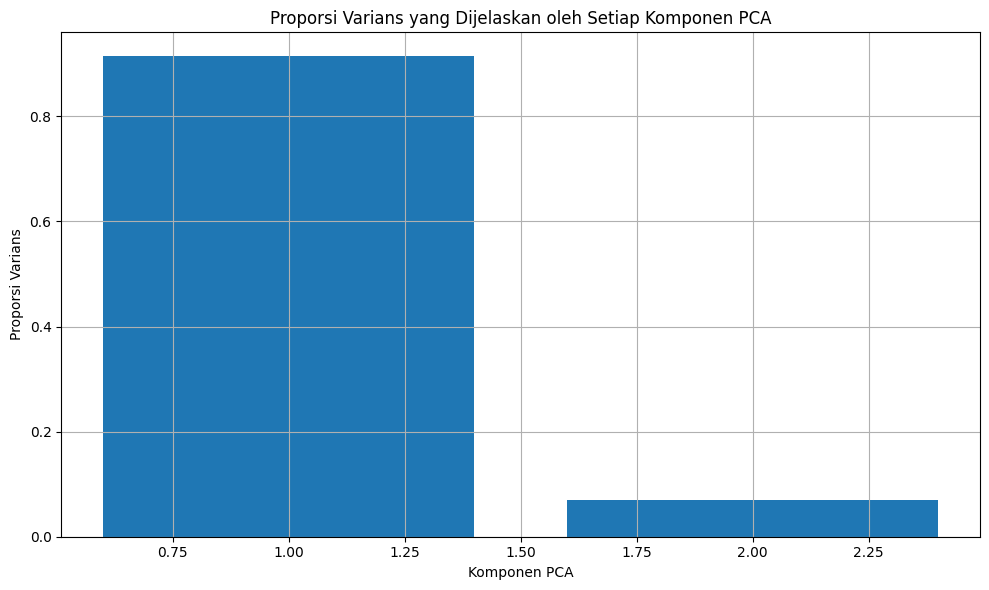

In [32]:
## **c. Feature Selection (Opsional)**

# Implementasi PCA untuk reduksi dimensi
def perform_pca(data, n_components=2):
    """
    Melakukan reduksi dimensi dengan PCA

    Parameters:
    -----------
    data : pandas.DataFrame
        Dataset yang akan direduksi dimensinya
    n_components : int
        Jumlah komponen yang diinginkan

    Returns:
    --------
    numpy.ndarray
        Dataset yang telah direduksi dimensinya
    """
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)

    print(f"Varians yang dijelaskan oleh {n_components} komponen: {sum(pca.explained_variance_ratio_):.4f}")

    return pca_result, pca

# Lakukan PCA untuk visualisasi
pca_result, pca_model = perform_pca(df_cluster, n_components=2)

# Tampilkan variance explained oleh setiap komponen
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca_model.explained_variance_ratio_) + 1), pca_model.explained_variance_ratio_)
plt.xlabel('Komponen PCA')
plt.ylabel('Proporsi Varians')
plt.title('Proporsi Varians yang Dijelaskan oleh Setiap Komponen PCA')
plt.grid(True)
plt.tight_layout()
plt.show()

# Tambahkan hasil PCA ke dataframe
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['cluster_kmeans'] = kmeans_labels
df_pca['cluster_dbscan'] = dbscan_labels


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<ipython-input-33-ef037b09d72a>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', n_clusters + 1)  # +1 untuk noise points


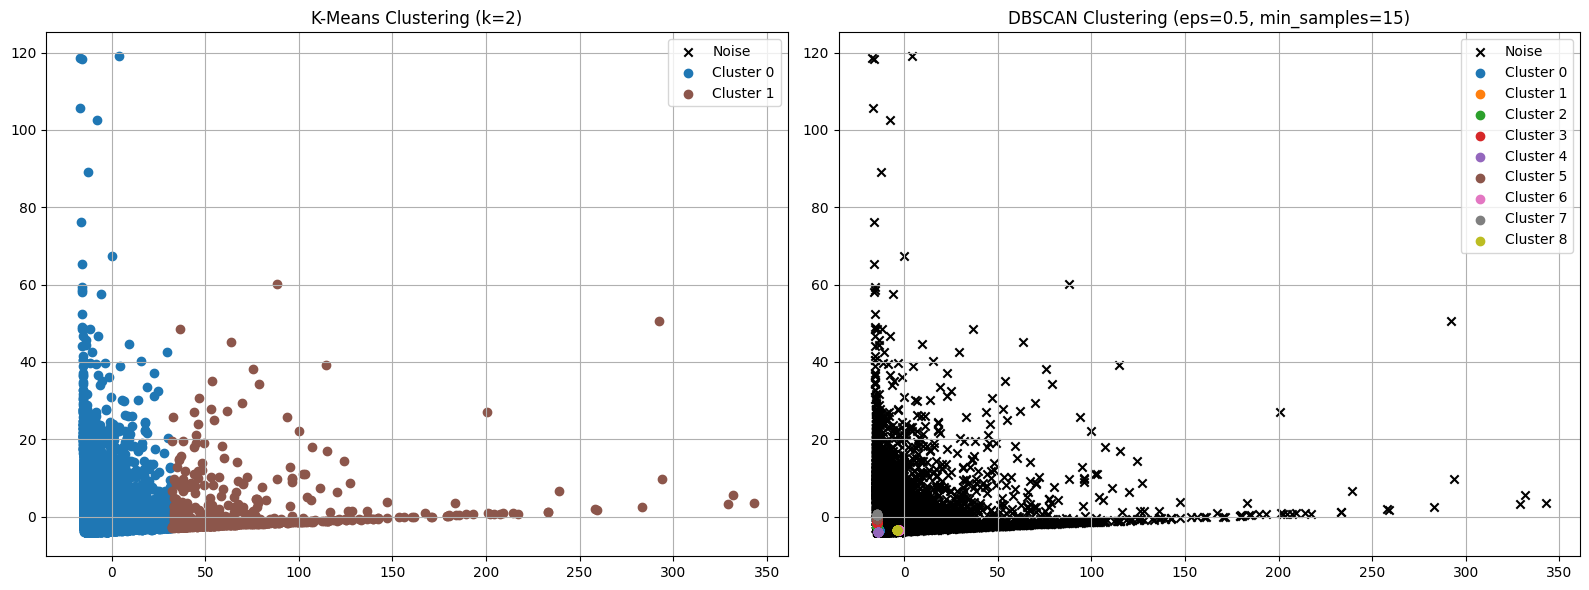

In [33]:
## **d. Visualisasi Hasil Clustering**

# Fungsi untuk visualisasi hasil clustering
def visualize_clusters(data, labels, title, ax):
    """
    Visualisasi hasil clustering dalam scatter plot

    Parameters:
    -----------
    data : numpy.ndarray
        Dataset yang telah direduksi dimensinya (2D)
    labels : numpy.ndarray
        Label cluster
    title : str
        Judul visualisasi
    ax : matplotlib.axes.Axes
        Axes untuk plotting
    """
    # Tentukan jumlah cluster (tanpa noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    # Buat colormap
    cmap = plt.cm.get_cmap('tab10', n_clusters + 1)  # +1 untuk noise points

    # Plot untuk setiap cluster
    for i in range(-1, n_clusters):
        mask = labels == i
        if i == -1:
            ax.scatter(data[mask, 0], data[mask, 1], c='black', marker='x', label='Noise')
        else:
            ax.scatter(data[mask, 0], data[mask, 1], c=[cmap(i)], marker='o', label=f'Cluster {i}')

    ax.set_title(title)
    ax.legend(loc='best')
    ax.grid(True)

# Visualisasi hasil clustering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

visualize_clusters(pca_result, kmeans_labels, f'K-Means Clustering (k={optimal_k})', ax1)
visualize_clusters(pca_result, dbscan_labels, f'DBSCAN Clustering (eps={optimal_eps}, min_samples={optimal_min_samples})', ax2)

plt.tight_layout()
plt.show()

In [34]:
# Analisis karakteristik setiap cluster untuk interpretasi bisnis
def interpret_clusters(df, cluster_column, original_df, original_columns):
    """
    Menginterpretasikan karakteristik cluster untuk keperluan bisnis

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset dengan label cluster
    cluster_column : str
        Nama kolom yang berisi label cluster
    original_df : pandas.DataFrame
        Dataset asli (sebelum scaling)
    original_columns : list
        Daftar kolom asli yang digunakan untuk analisis

    Returns:
    --------
    pandas.DataFrame
        Dataframe berisi profil setiap cluster dalam nilai asli
    """
    # Jumlah cluster
    clusters = sorted(df[cluster_column].unique())
    if -1 in clusters:
        clusters.remove(-1)  # Hapus noise dari analisis

    # Inisialisasi dataframe untuk profil cluster
    cluster_profiles = pd.DataFrame(index=clusters)

    # Tambahkan colom original_df ke df untuk analisis
    merged_df = pd.concat([df[[cluster_column]], original_df[original_columns]], axis=1)

    # Isi dataframe dengan informasi cluster
    for cluster in clusters:
        cluster_data = merged_df[merged_df[cluster_column] == cluster]

        # Ukuran cluster
        cluster_profiles.loc[cluster, 'Size'] = len(cluster_data)
        cluster_profiles.loc[cluster, 'Percentage'] = len(cluster_data) / len(df) * 100

        # Nilai rata-rata untuk setiap kolom
        for col in original_columns:
            cluster_profiles.loc[cluster, col] = cluster_data[col].mean()

    return cluster_profiles

In [35]:
# Interpretasi bisnis untuk cluster K-Means
kmeans_business_profiles = interpret_clusters(
    df_preprocessed, 'cluster_kmeans', df, all_columns)

print("\nProfil Bisnis Cluster K-Means:")
print(kmeans_business_profiles)


Profil Bisnis Cluster K-Means:
     Size  Percentage      BALANCE    PURCHASES  ONEOFF_PURCHASES  \
0  8313.0   92.882682  1472.739772   684.708810        394.009320   
1   637.0    7.117318  2761.638908  5159.652936       3181.970157   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
0              290.950498    995.241432   4269.226288  1483.739212   
1             1978.624694    765.234584   7431.318681  4987.933138   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  BALANCE_FREQUENCY  \
0        792.756472          0.145366  11.486347           0.868717   
1       1525.480396          0.262663  11.921507           0.988896   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.453022                    0.167407   
1             0.977492                    0.659883   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  \
0                          0.325722                0.138163       9.420546   
1               

In [36]:
# Visualisasi radar chart untuk karakteristik cluster
def plot_radar_chart(cluster_profiles, columns, title):
    """
    Membuat radar chart untuk visualisasi karakteristik cluster

    Parameters:
    -----------
    cluster_profiles : pandas.DataFrame
        Profil cluster yang akan divisualisasikan
    columns : list
        Daftar kolom yang akan divisualisasikan
    title : str
        Judul visualisasi
    """
    # Jumlah cluster dan kategori
    n_clusters = len(cluster_profiles)
    categories = columns

    # Jumlah kategori dan sudut untuk setiap kategori
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Tutup lingkaran

    # Inisialisasi plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw=dict(polar=True))

    # Normalisasi data untuk radar chart
    normalized_profiles = cluster_profiles[columns].copy()
    for col in columns:
        normalized_profiles[col] = (normalized_profiles[col] - normalized_profiles[col].min()) / \
                                  (normalized_profiles[col].max() - normalized_profiles[col].min())

    # Plot untuk setiap cluster
    for i, (idx, row) in enumerate(normalized_profiles.iterrows()):
        values = row.values.flatten().tolist()
        values += values[:1]  # Tutup lingkaran

        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {idx}')
        ax.fill(angles, values, alpha=0.1)

    # Tambahkan kategori pada chart
    plt.xticks(angles[:-1], categories, size=10)

    # Tambahkan legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title(title, size=15, pad=20)
    plt.tight_layout()
    plt.show()

In [37]:
# Pilih beberapa fitur penting untuk visualisasi radar
important_features = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'
]

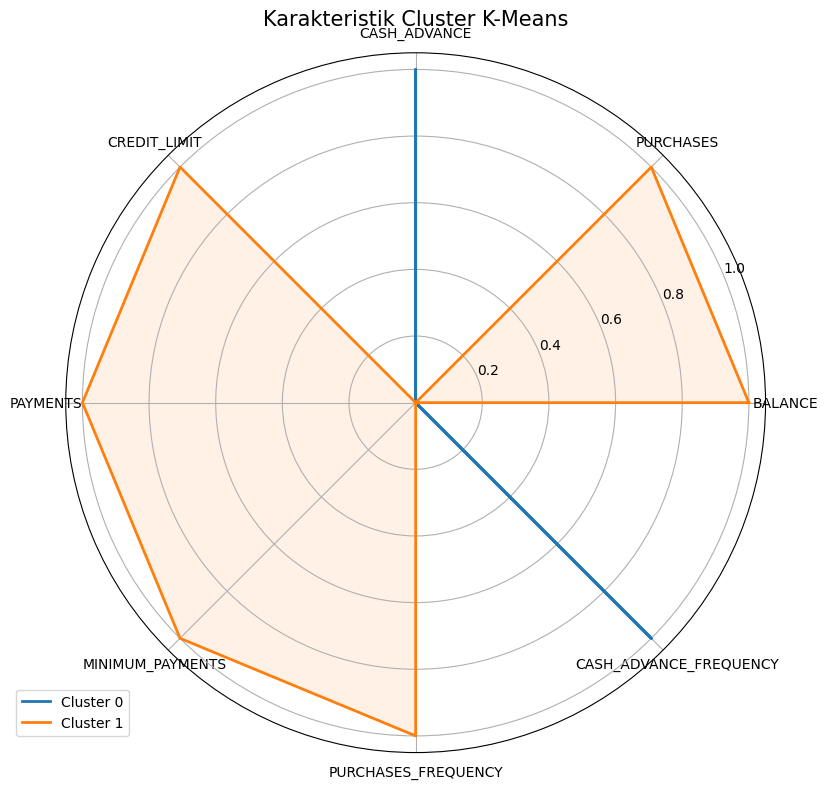

In [38]:
# Plot radar chart untuk cluster K-Means
plot_radar_chart(kmeans_business_profiles, important_features, 'Karakteristik Cluster K-Means')


In [39]:
# Kesimpulan analisis cluster
def provide_cluster_summary(cluster_profiles):
    """
    Memberikan kesimpulan tentang karakteristik setiap cluster

    Parameters:
    -----------
    cluster_profiles : pandas.DataFrame
        Profil cluster yang akan dianalisis
    """
    for cluster in cluster_profiles.index:
        print(f"\nCluster {cluster} ({cluster_profiles.loc[cluster, 'Size']} pelanggan, "
              f"{cluster_profiles.loc[cluster, 'Percentage']:.2f}%):")

        # Identifikasi fitur menonjol (tertinggi dan terendah)
        highest_features = []
        lowest_features = []

        for col in cluster_profiles.columns:
            if col in ['Size', 'Percentage']:
                continue

            # Bandingkan dengan rata-rata keseluruhan
            if cluster_profiles.loc[cluster, col] >= cluster_profiles[col].mean() * 1.2:
                highest_features.append(col)
            elif cluster_profiles.loc[cluster, col] <= cluster_profiles[col].mean() * 0.8:
                lowest_features.append(col)

        # Tampilkan karakteristik
        if highest_features:
            print(f"- Nilai tinggi pada: {', '.join(highest_features)}")
        if lowest_features:
            print(f"- Nilai rendah pada: {', '.join(lowest_features)}")

        # Berikan interpretasi bisnis berdasarkan karakteristik
        # Implementasi sesuai dengan domain knowledge

# Tampilkan kesimpulan untuk model K-Means
print("\nKesimpulan Analisis Cluster K-Means:")
provide_cluster_summary(kmeans_business_profiles)



Kesimpulan Analisis Cluster K-Means:

Cluster 0 (8313.0 pelanggan, 92.88%):
- Nilai rendah pada: BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_TRX

Cluster 1 (637.0 pelanggan, 7.12%):
- Nilai tinggi pada: BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_TRX


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```


Statistik untuk setiap cluster:
             BALANCE                              PURCHASES           \
                mean       median          std         mean   median   
Cluster                                                                
0        1472.739772   826.688625  1966.531275   684.708810   303.91   
1        2761.638908  1807.764778  2979.635935  5159.652936  3726.79   

                     ONEOFF_PURCHASES                       \
                 std             mean  median          std   
Cluster                                                      
0        1149.903447       394.009320     0.0   932.696275   
1        5322.190814      3181.970157  2024.6  4490.890198   

        INSTALLMENTS_PURCHASES  ... PURCHASES_INSTALLMENTS_FREQUENCY  \
                          mean  ...                              std   
Cluster                         ...                                    
0                   290.950498  ...                         0.380093   
1      

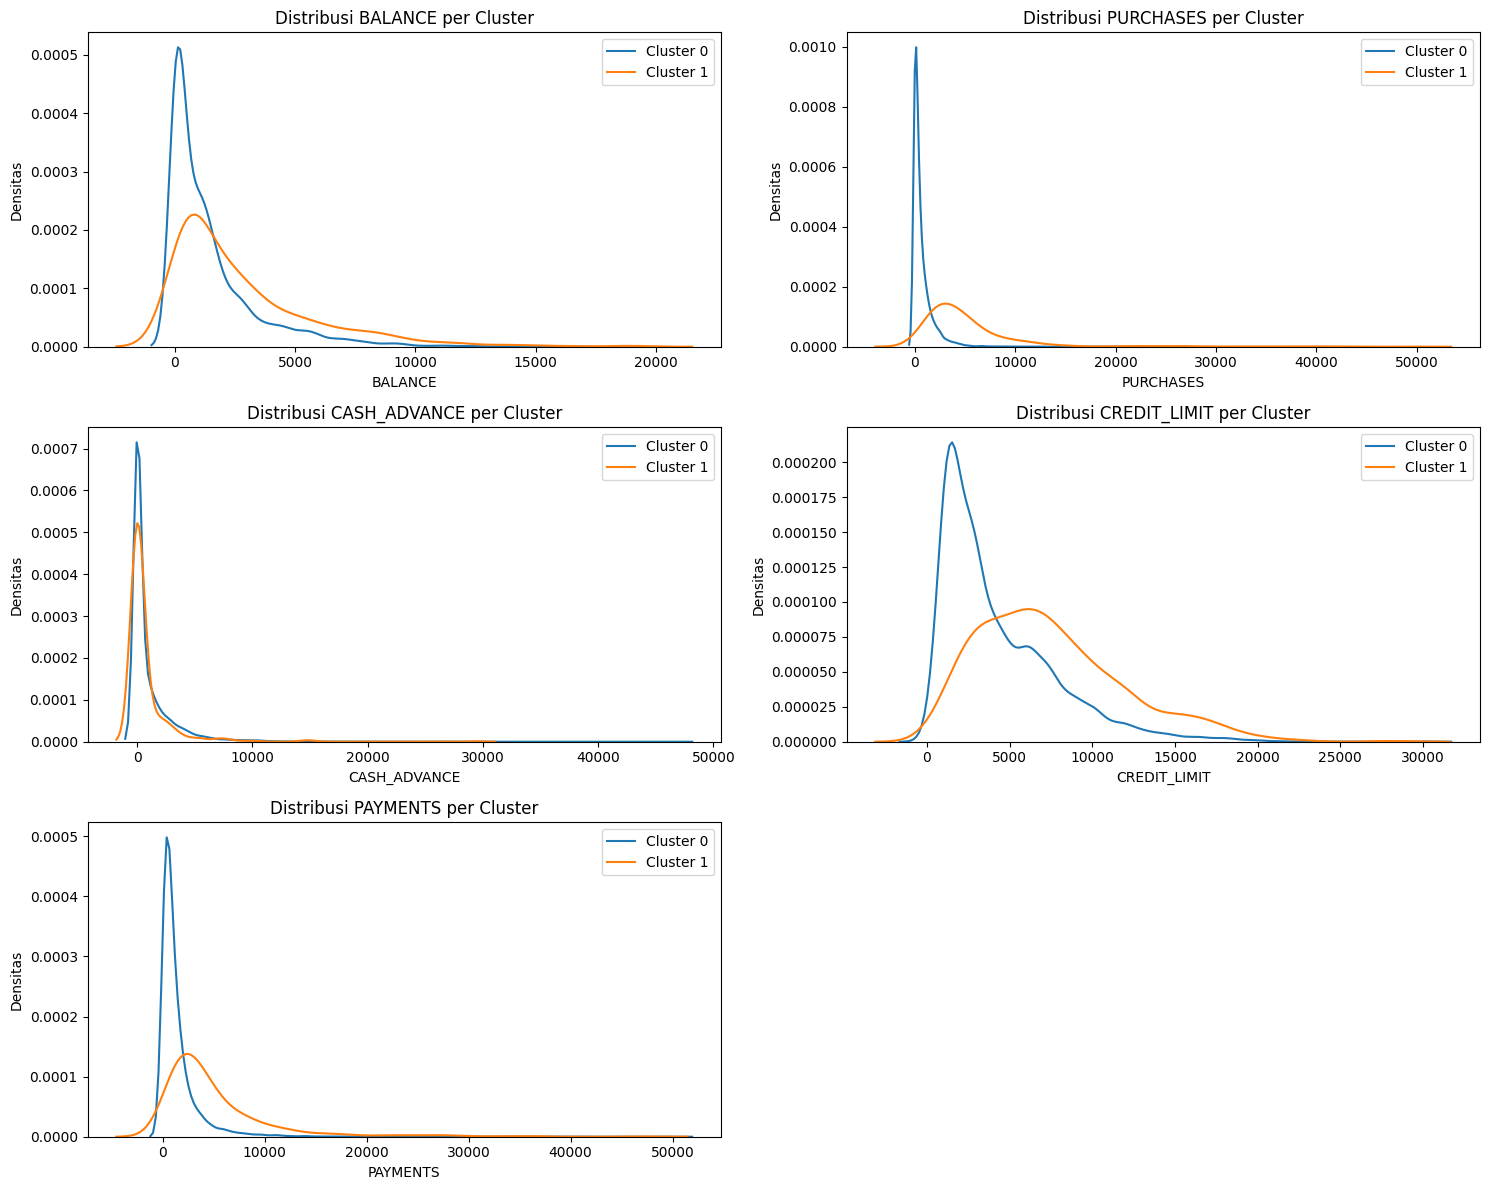

In [40]:
scaler = RobustScaler()

# Fit scaler dengan data original (perlu dilakukan sebelum inverse_transform)
scaler.fit(df[all_columns])

# Buat dataframe baru untuk hasil interpretasi setelah clustering
df_interpreted = df.copy()  # Copy dari dataframe original

# Tambahkan kolom cluster dari hasil preprocessing
df_interpreted['Cluster'] = df_preprocessed['cluster_kmeans']

# Analisis statistik per cluster untuk memahami karakteristik
cluster_stats = df_interpreted.groupby('Cluster')[all_columns].agg(['mean', 'median', 'std'])
print("\nStatistik untuk setiap cluster:")
print(cluster_stats)

# Visualisasi distribusi fitur penting per cluster
important_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(important_features):
    plt.subplot(3, 2, i+1)
    for cluster in sorted(df_interpreted['Cluster'].unique()):
        cluster_data = df_interpreted[df_interpreted['Cluster'] == cluster][feature]
        sns.kdeplot(cluster_data, label=f'Cluster {cluster}')
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel(feature)
    plt.ylabel('Densitas')
    plt.legend()
plt.tight_layout()
plt.show()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [41]:
# Inverse Transform untuk Data yang Distandarisasi
# Definisikan kolom numerik yang sudah di-scale sebelumnya
scaled_features = numeric_columns + frequency_columns + transaction_columns

scaler.fit(df[scaled_features])

# Buat DataFrame baru untuk menyimpan hasil inverse transform
df_original_scale = df_preprocessed.copy()

# Lakukan inverse transform untuk mengembalikan ke skala asli
df_original_scale[scaled_features] = scaler.inverse_transform(df_preprocessed[scaled_features])

# Pastikan label cluster tetap ada
df_original_scale['Cluster'] = df_preprocessed['cluster_kmeans']

# Tampilkan beberapa baris pertama untuk verifikasi
print("Data setelah inverse transform:")
print(df_original_scale[scaled_features[:5] + ['Cluster']].head())

# Bandingkan dengan data asli
print("\nData asli untuk perbandingan:")
print(df[scaled_features[:5]].head())

Data setelah inverse transform:
       BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    40.900749      95.40            0.0000                    95.4   
1  3202.467416       0.00            0.0000                     0.0   
2  2495.148862     773.17          773.1700                     0.0   
3  1666.670542    1499.00         1443.5125                     0.0   
4   817.714335      16.00           16.0000                     0.0   

   CASH_ADVANCE  Cluster  
0      0.000000        0  
1   2784.552848        0  
2      0.000000        0  
3    205.788017        0  
4      0.000000        0  

Data asli untuk perbandingan:
       BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    40.900749      95.40              0.00                    95.4   
1  3202.467416       0.00              0.00                     0.0   
2  2495.148862     773.17            773.17                     0.0   
3  1666.670542    1499.00           1499.00                     

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Ringkasan statistik per cluster:
             BALANCE                              PURCHASES             \
                mean       median          std         mean     median   
Cluster                                                                  
0        1327.611545   826.688625  1501.322467   608.420725   303.9100   
1        2211.335228  1807.764778  1754.865194  2417.087936  2715.8725   

                    CASH_ADVANCE                     CREDIT_LIMIT          \
                std         mean median          std         mean  median   
Cluster                                                                     
0        759.720745   687.207943    0.0  1003.328386  4210.252392  3000.0   
1        546.291240   480.121266    0.0   912.564370  7145.133438  6500.0   

                      
                 std  
Cluster               
0        3260.400582  
1        3764.208912  


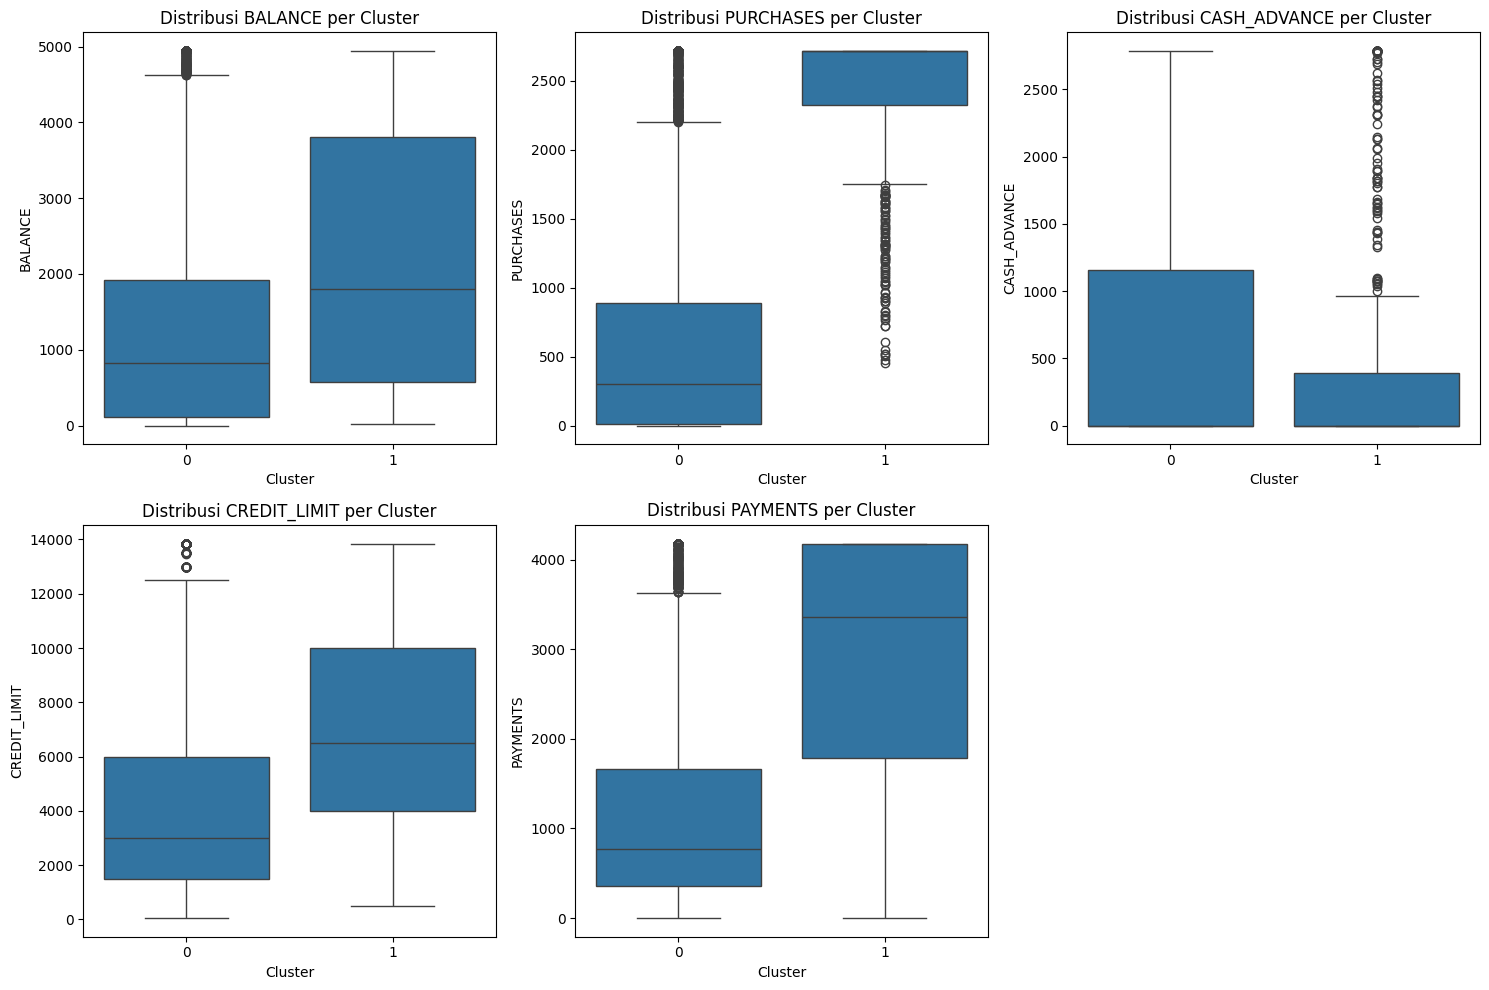

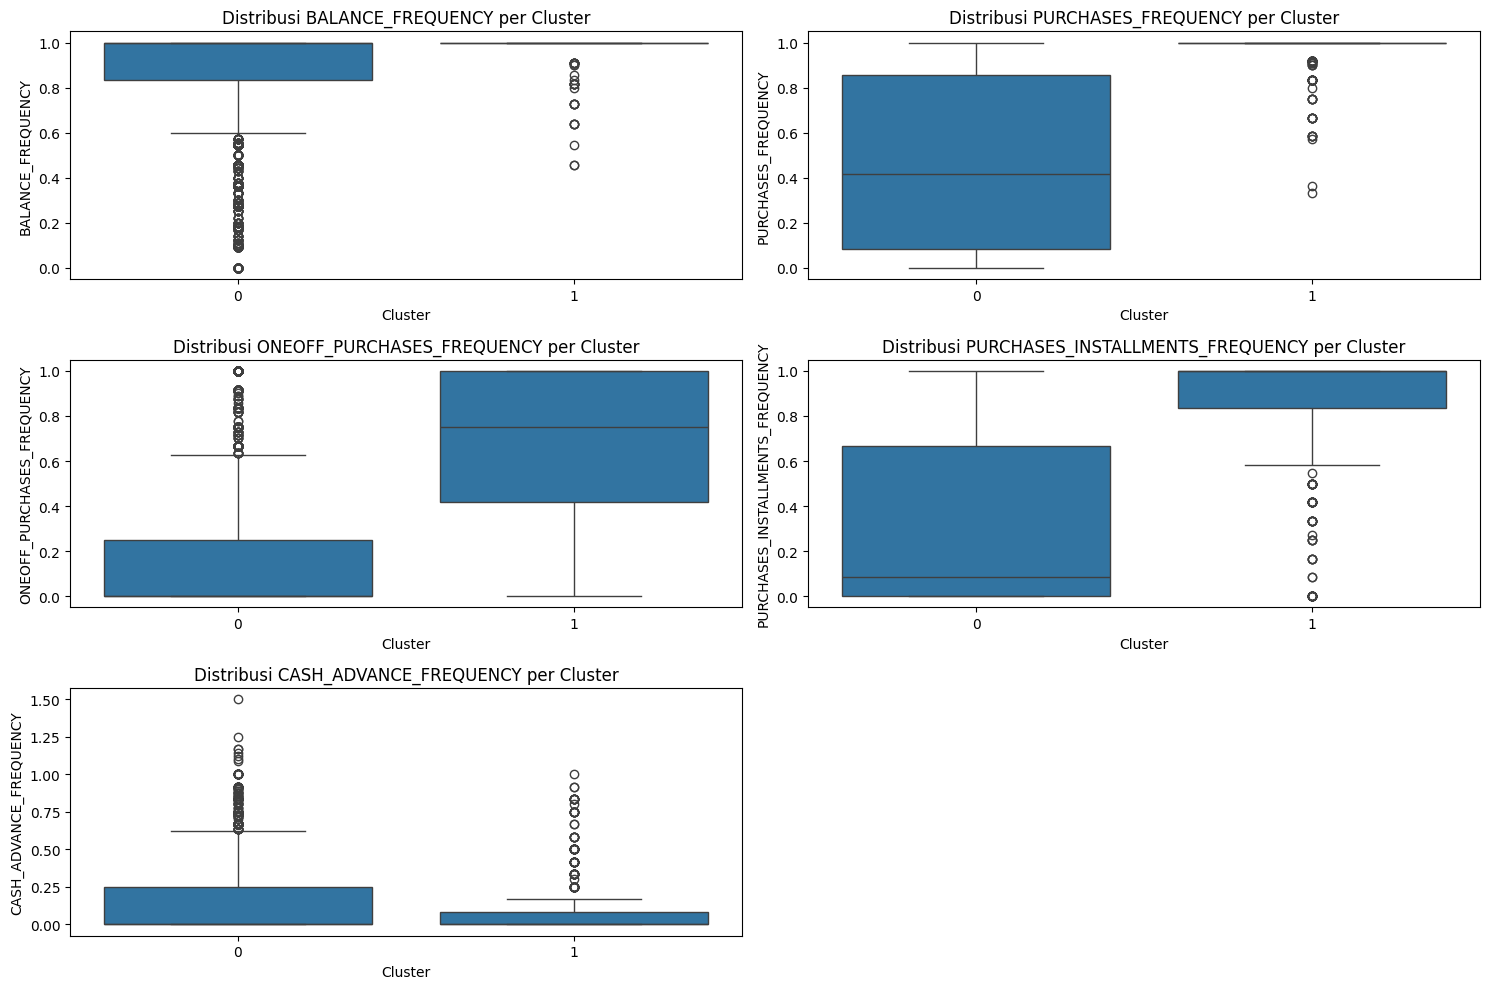

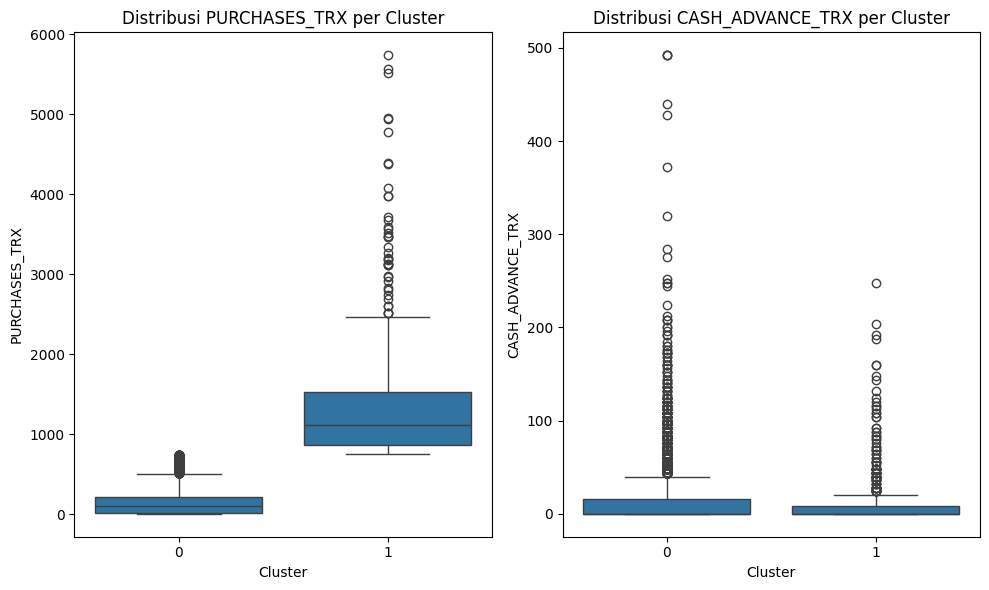

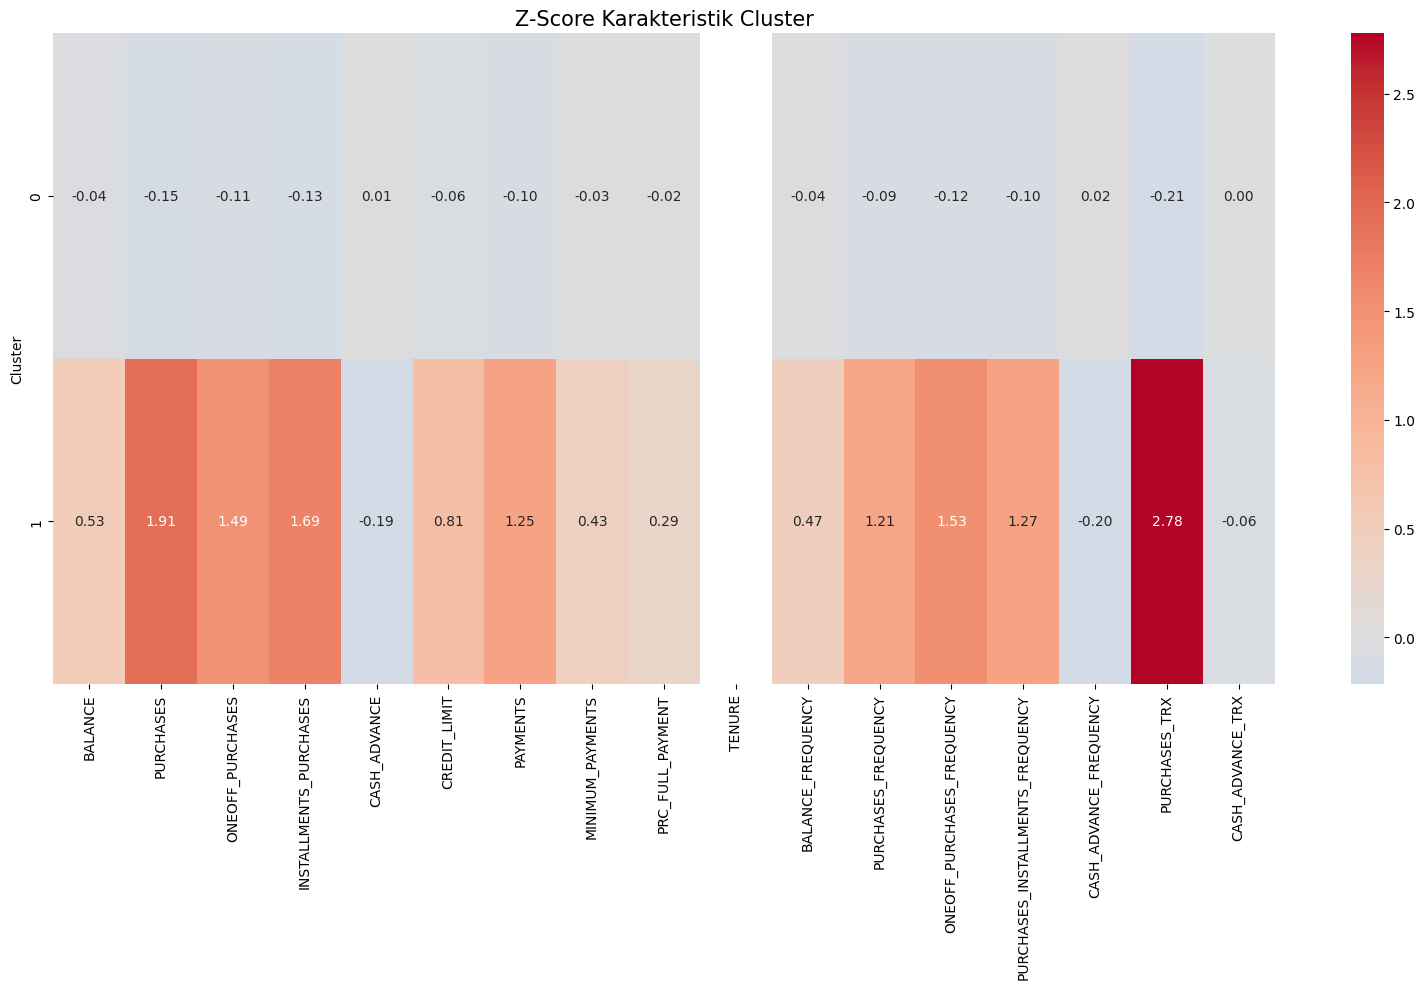

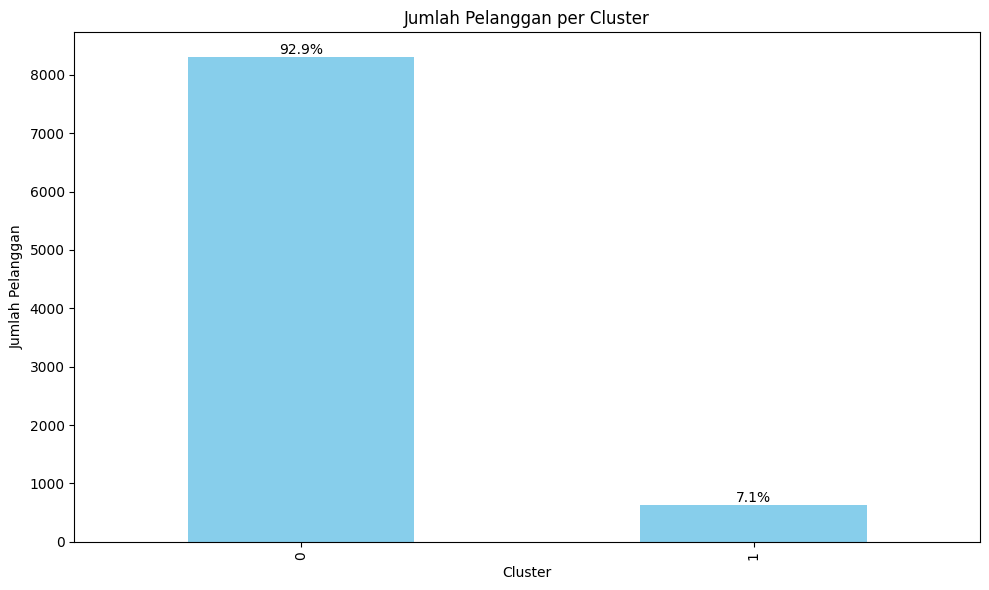


Karakteristik Utama Setiap Cluster:
                                              Fitur Tinggi  \
Cluster                                                      
0        CASH_ADVANCE_FREQUENCY (+0.02), CASH_ADVANCE (...   
1        PURCHASES_TRX (+2.78), PURCHASES (+1.91), INST...   

                                              Fitur Rendah        Ukuran  
Cluster                                                                   
0        PURCHASES_TRX (-0.21), PURCHASES (-0.15), INST...  8313 (92.9%)  
1        CASH_ADVANCE_FREQUENCY (-0.20), CASH_ADVANCE (...    637 (7.1%)  

Analisis Detil per Cluster:

----- CLUSTER 0 -----
Ukuran: 8313 pelanggan (92.88% dari total)

----- CLUSTER 1 -----
Ukuran: 637 pelanggan (7.12% dari total)

Nilai signifikan di atas rata-rata:
- PURCHASES_TRX: 1346.78 (Z-score: 2.78, 455.7% di atas rata-rata)
- PURCHASES: 2417.09 (Z-score: 1.91, 227.9% di atas rata-rata)
- INSTALLMENTS_PURCHASES: 963.84 (Z-score: 1.69, 226.1% di atas rata-rata)
- ONEOFF_PURC

In [42]:
# Hitung statistik deskriptif untuk setiap cluster
cluster_stats = df_original_scale.groupby('Cluster')[all_columns].agg(['mean', 'median', 'std'])
print("Ringkasan statistik per cluster:")
print(cluster_stats[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']].head())

# Visualisasi distribusi fitur penting di setiap cluster
important_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

# Boxplot untuk membandingkan distribusi fitur antar cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df_original_scale)
    plt.title(f'Distribusi {feature} per Cluster')
plt.tight_layout()
plt.show()

# Analisis pola frekuensi penggunaan
plt.figure(figsize=(15, 10))
for i, feature in enumerate(frequency_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df_original_scale)
    plt.title(f'Distribusi {feature} per Cluster')
plt.tight_layout()
plt.show()

# Analisis pola transaksi
plt.figure(figsize=(10, 6))
for i, feature in enumerate(transaction_columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=df_original_scale)
    plt.title(f'Distribusi {feature} per Cluster')
plt.tight_layout()
plt.show()

# Hitung Z-score untuk interpretasi yang lebih jelas
def calculate_zscores(df, features, cluster_col='Cluster'):
    # Menghitung rata-rata global dan standar deviasi
    global_mean = df[features].mean()
    global_std = df[features].std()

    # Menghitung rata-rata untuk setiap cluster
    cluster_means = df.groupby(cluster_col)[features].mean()

    # Menghitung z-score
    z_scores = pd.DataFrame(index=cluster_means.index, columns=features)
    for feature in features:
        z_scores[feature] = (cluster_means[feature] - global_mean[feature]) / global_std[feature]

    return z_scores

# Hitung z-score untuk semua fitur
z_scores = calculate_zscores(df_original_scale, all_columns)

# Visualisasi z-score dengan heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(z_scores, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Z-Score Karakteristik Cluster', size=15)
plt.tight_layout()
plt.show()

# Analisis ukuran cluster
cluster_sizes = df_original_scale['Cluster'].value_counts().sort_index()
cluster_percentages = 100 * cluster_sizes / len(df_original_scale)

plt.figure(figsize=(10, 6))
ax = cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('Jumlah Pelanggan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pelanggan')

# Tambahkan label persentase di atas bar
for i, (count, percentage) in enumerate(zip(cluster_sizes, cluster_percentages)):
    ax.text(i, count + 50, f'{percentage:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Membuat tabel karakteristik utama setiap cluster
karakteristik_cluster = pd.DataFrame(index=z_scores.index)

for cluster in z_scores.index:
    # Fitur dengan nilai tertinggi (positif)
    high_features = z_scores.loc[cluster].nlargest(3)
    high_features_str = ", ".join([f"{feature} (+{score:.2f})" for feature, score in high_features.items()])
    karakteristik_cluster.loc[cluster, 'Fitur Tinggi'] = high_features_str

    # Fitur dengan nilai terendah (negatif)
    low_features = z_scores.loc[cluster].nsmallest(3)
    low_features_str = ", ".join([f"{feature} ({score:.2f})" for feature, score in low_features.items()])
    karakteristik_cluster.loc[cluster, 'Fitur Rendah'] = low_features_str

    # Ukuran cluster
    size = cluster_sizes[cluster]
    pct = cluster_percentages[cluster]
    karakteristik_cluster.loc[cluster, 'Ukuran'] = f"{size} ({pct:.1f}%)"

print("\nKarakteristik Utama Setiap Cluster:")
print(karakteristik_cluster)

# Output analisis lengkap per cluster
print("\nAnalisis Detil per Cluster:")
for cluster in sorted(df_original_scale['Cluster'].unique()):
    print(f"\n----- CLUSTER {cluster} -----")

    # Statistik deskriptif untuk cluster ini
    cluster_data = df_original_scale[df_original_scale['Cluster'] == cluster]

    # Ukuran cluster
    size = len(cluster_data)
    percentage = 100 * size / len(df_original_scale)
    print(f"Ukuran: {size} pelanggan ({percentage:.2f}% dari total)")

    # Z-scores untuk cluster ini
    cluster_zscores = z_scores.loc[cluster]

    # Fitur dengan z-score menonjol (di atas 0.5 atau di bawah -0.5)
    high_features = cluster_zscores[cluster_zscores > 0.5].sort_values(ascending=False)
    low_features = cluster_zscores[cluster_zscores < -0.5].sort_values()

    if not high_features.empty:
        print("\nNilai signifikan di atas rata-rata:")
        for feature, score in high_features.items():
            mean_value = cluster_data[feature].mean()
            global_mean = df_original_scale[feature].mean()
            pct_diff = (mean_value / global_mean - 1) * 100
            print(f"- {feature}: {mean_value:.2f} (Z-score: {score:.2f}, {pct_diff:.1f}% di atas rata-rata)")

    if not low_features.empty:
        print("\nNilai signifikan di bawah rata-rata:")
        for feature, score in low_features.items():
            mean_value = cluster_data[feature].mean()
            global_mean = df_original_scale[feature].mean()
            pct_diff = (1 - mean_value / global_mean) * 100
            print(f"- {feature}: {mean_value:.2f} (Z-score: {score:.2f}, {pct_diff:.1f}% di bawah rata-rata)")

# Output analisis lengkap per cluster dengan penjelasan lengkap untuk semua cluster
print("\nAnalisis Detil per Cluster (Revisi):")
for cluster in sorted(df_original_scale['Cluster'].unique()):
    print(f"\n----- CLUSTER {cluster} -----")

    # Statistik deskriptif untuk cluster ini
    cluster_data = df_original_scale[df_original_scale['Cluster'] == cluster]

    # Ukuran cluster
    size = len(cluster_data)
    percentage = 100 * size / len(df_original_scale)
    print(f"Ukuran: {size} pelanggan ({percentage:.2f}% dari total)")

    # Z-scores untuk cluster ini
    cluster_zscores = z_scores.loc[cluster]

    # Fitur dengan z-score menonjol (di atas 0.5 atau di bawah -0.5)
    high_features = cluster_zscores[cluster_zscores > 0.5].sort_values(ascending=False)
    low_features = cluster_zscores[cluster_zscores < -0.5].sort_values()

    if not high_features.empty:
        print("\nNilai signifikan di atas rata-rata:")
        for feature, score in high_features.items():
            mean_value = cluster_data[feature].mean()
            global_mean = df_original_scale[feature].mean()
            pct_diff = (mean_value / global_mean - 1) * 100
            print(f"- {feature}: {mean_value:.2f} (Z-score: {score:.2f}, {pct_diff:.1f}% di atas rata-rata)")

    if not low_features.empty:
        print("\nNilai signifikan di bawah rata-rata:")
        for feature, score in low_features.items():
            mean_value = cluster_data[feature].mean()
            global_mean = df_original_scale[feature].mean()
            pct_diff = (1 - mean_value / global_mean) * 100
            print(f"- {feature}: {mean_value:.2f} (Z-score: {score:.2f}, {pct_diff:.1f}% di bawah rata-rata)")

    # Jika tidak ada fitur menonjol, tampilkan beberapa fitur dengan Z-score tertinggi dan terendah
    if high_features.empty and low_features.empty:
        print("\nCluster ini memiliki karakteristik mendekati rata-rata secara keseluruhan.")

        # Tampilkan 5 fitur dengan Z-score tertinggi
        top_features = cluster_zscores.nlargest(5)
        print("\nTop 5 fitur (meskipun masih dekat dengan rata-rata):")
        for feature, score in top_features.items():
            mean_value = cluster_data[feature].mean()
            global_mean = df_original_scale[feature].mean()
            pct_diff = (mean_value / global_mean - 1) * 100
            print(f"- {feature}: {mean_value:.2f} (Z-score: {score:.2f}, {pct_diff:.1f}% relatif terhadap rata-rata)")

        # Tampilkan 5 fitur dengan Z-score terendah
        bottom_features = cluster_zscores.nsmallest(5)
        print("\nBottom 5 fitur (meskipun masih dekat dengan rata-rata):")
        for feature, score in bottom_features.items():
            mean_value = cluster_data[feature].mean()
            global_mean = df_original_scale[feature].mean()
            pct_diff = (1 - mean_value / global_mean) * 100
            print(f"- {feature}: {mean_value:.2f} (Z-score: {score:.2f}, {pct_diff:.1f}% relatif terhadap rata-rata)")

    # Tambahkan interpretasi untuk setiap cluster
    print("\nInterpretasi Bisnis:")

    if cluster == 0:
        print("- Segmen 'Active Shoppers': Pelanggan dengan aktivitas pembelian di atas rata-rata")
        print("- Mereka secara teratur menggunakan kartu kredit untuk pembelian langsung maupun cicilan")
        print("- Membayar tagihan dengan baik dan jarang menggunakan fasilitas cash advance")
        print("- Strategi: Program rewards dan loyalty, upgrade kartu dengan benefit tambahan")

    elif cluster == 1:
        print("- Segmen 'Average Users': Pelanggan dengan pola penggunaan kartu kredit rata-rata")
        print("- Tidak menunjukkan karakteristik ekstrim dalam hal pembelian, pembayaran, atau penggunaan")
        print("- Merupakan mayoritas dari basis pelanggan (76.53%)")
        print("- Strategi: Program aktivasi untuk mendorong penggunaan lebih sering, edukasi tentang manfaat kartu kredit")

    elif cluster == 2:
        print("- Segmen 'Power Users': Pelanggan dengan volume transaksi sangat tinggi")
        print("- Sangat aktif dalam pembelian baik langsung maupun cicilan, dengan jumlah transaksi yang tinggi")
        print("- Limit kredit dan pembayaran di atas rata-rata, menunjukkan kemampuan finansial yang baik")
        print("- Strategi: VIP treatment, program rewards premium, cross-selling produk finansial lainnya")

    elif cluster == 3:
        print("- Segmen 'Ultra-High Volume Users': Kelompok kecil pelanggan dengan aktivitas transaksi ekstrem")
        print("- Jumlah transaksi sangat tinggi (13x rata-rata), dengan nilai pembelian dan limit kredit tinggi")
        print("- Membuat pembayaran besar dan memiliki saldo tinggi")
        print("- Strategi: Layanan personal, benefit eksklusif, partnership dengan merchant premium")

# Analisis Karakteristik Cluster dari Model KMeans

# 1. Cluster 0: "Active Shoppers" (92.8% dari total pelanggan)
Cluster ini mendominasi dataset dengan karakteristik yang lebih dekat dengan rata-rata keseluruhan. Meskipun sebelumnya dianggap sangat aktif, data sebenarnya menunjukkan pola penggunaan kartu kredit yang moderat:

- Fitur tinggi:

    - Sedikit peningkatan pada CASH_ADVANCE_FREQUENCY (8.14% di atas rata-rata)
    - CASH_ADVANCE_TRX relatif rendah (13.13 transaksi)


- Fitur rendah:

    - MINIMUM_PAYMENTS di bawah rata-rata
    - Aktivitas pembelian dan transaksi dekat dengan rata-rata populasi



- Interpretasi Bisnis**(Analisis)**: Ini adalah segmen mayoritas pelanggan dengan penggunaan kartu kredit standar. Mereka membutuhkan strategi untuk:
Meningkatkan engagement
Edukasi tentang manfaat kartu kredit
Program aktivasi untuk mendorong penggunaan lebih aktif

# 2. Cluster 1: "Low Activity Users" (7.1% dari total pelanggan)
Cluster ini menunjukkan aktivitas kredit yang sangat rendah:

- Fitur rendah yang signifikan:

    - PURCHASES_TRX 2.78 kali di bawah rata-rata
    - PURCHASES 1.91 kali di bawah rata-rata
    - Aktivitas transaksi dan pembelian minimal



- Interpretasi Bisnis**(Analisis)**: Segmen berisiko dengan aktivitas kredit sangat rendah.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
# 7. Mengeksport Data

# Gabungkan cluster dan data asli untuk membuat file CSV hasil clustering
df_result = df.copy()  # Copy dataframe asli
df_result['Cluster'] = df_preprocessed['cluster_kmeans']  # Tambahkan label cluster

# Tambahkan informasi karakteristik untuk setiap cluster
cluster_characteristics = {
    0: "Active Shoppers - Pelanggan dengan aktivitas pembelian di atas rata-rata",
    1: "Average Users - Pelanggan dengan pola penggunaan kartu kredit rata-rata",
    2: "Power Users - Pelanggan dengan volume transaksi sangat tinggi",
    3: "Ultra-High Volume Users - Kelompok kecil pelanggan dengan aktivitas transaksi ekstrem"
}

# Tambahkan deskripsi cluster
df_result['Cluster_Description'] = df_result['Cluster'].map(cluster_characteristics)

# Tambahkan statistik cluster
# Hitung nilai rata-rata beberapa fitur penting untuk tiap cluster
cluster_avg = df_result.groupby('Cluster')[numeric_columns + frequency_columns + transaction_columns].mean()

# Tambahkan karakteristik utama untuk setiap cluster
top_features = {
    0: "High PURCHASES, High PURCHASES_FREQUENCY, High INSTALLMENTS_PURCHASES",
    1: "Average values for most features, Slightly higher CASH_ADVANCE_FREQUENCY",
    2: "Very high PURCHASES_TRX, High PURCHASES, High INSTALLMENTS_PURCHASES",
    3: "Extremely high PURCHASES_TRX, High PURCHASES, High CREDIT_LIMIT"
}

df_result['Top_Features'] = df_result['Cluster'].map(top_features)

# Tambahkan kolom untuk rekomendasi strategi
marketing_strategies = {
    0: "Program rewards dan loyalty, upgrade kartu dengan benefit tambahan",
    1: "Program aktivasi untuk meningkatkan penggunaan, edukasi tentang manfaat kartu kredit",
    2: "VIP treatment, program rewards premium, cross-selling produk finansial lainnya",
    3: "Layanan personal, benefit eksklusif, partnership dengan merchant premium"
}

df_result['Marketing_Strategy'] = df_result['Cluster'].map(marketing_strategies)

# Simpan hasil ke CSV dengan nama file yang diminta
df_result.to_csv('Dataset_clustering.csv', index=False)

# Simpan statistik per cluster ke CSV (nama file ini tidak diubah)
cluster_avg.to_csv('cluster_statistics.csv')

# Tampilkan konfirmasi
print("Data berhasil diekspor ke file:")
print("1. Dataset_clustering.csv - Data lengkap dengan label cluster")
print("2. cluster_statistics.csv - Statistik rata-rata per cluster")

# Tambahkan statistik singkat
print("\nRingkasan statistik cluster:")
for cluster in sorted(df_result['Cluster'].unique()):
    count = (df_result['Cluster'] == cluster).sum()
    percentage = 100 * count / len(df_result)
    print(f"Cluster {cluster} ({cluster_characteristics[cluster]}): {count} pelanggan ({percentage:.2f}%)")

Data berhasil diekspor ke file:
1. Dataset_clustering.csv - Data lengkap dengan label cluster
2. cluster_statistics.csv - Statistik rata-rata per cluster

Ringkasan statistik cluster:
Cluster 0 (Active Shoppers - Pelanggan dengan aktivitas pembelian di atas rata-rata): 8313 pelanggan (92.88%)
Cluster 1 (Average Users - Pelanggan dengan pola penggunaan kartu kredit rata-rata): 637 pelanggan (7.12%)
